1. <a href="#0">Read the dataset</a>
2. <a href="#1">Data investigation</a>
3. <a href="#2">Data preprocessing </a>
4. <a href="#3">Features transformation </a>
5. <a href="#4"> T-SNE </a>
6. <a href="#5">DBSCN</a>
7. <a href="#6">K means</a>
8. <a href="#7">Features selection</a>
9. <a href="#8">Hierarchical Clustering</a>
10. <a href="#9">GaussianMixture</a>
11. <a href="#10 ">Clusters overview</a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

# 1. <a name="0">Read the dataset</a>
(<a href="#0">Go to top</a>)


In [4]:
#read the data
data_path = 'CC_GENERAL.csv'
df = pd.read_csv(data_path)
print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (8950, 18)


# 2. <a name="1">Data investigation</a>
(<a href="#0">Go to top</a>)

Check the data quality and assess any issues in the data as:
- null values in each column
- each column has the proper data type
- outliers
- duplicate rows
- distribution for each column (skewness)
<br>

In [5]:
# Let's see the data types and non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
round(df.isnull().sum(axis=0)*100/df.shape[0],2)

CUST_ID                             0.00
BALANCE                             0.00
BALANCE_FREQUENCY                   0.00
PURCHASES                           0.00
ONEOFF_PURCHASES                    0.00
INSTALLMENTS_PURCHASES              0.00
CASH_ADVANCE                        0.00
PURCHASES_FREQUENCY                 0.00
ONEOFF_PURCHASES_FREQUENCY          0.00
PURCHASES_INSTALLMENTS_FREQUENCY    0.00
CASH_ADVANCE_FREQUENCY              0.00
CASH_ADVANCE_TRX                    0.00
PURCHASES_TRX                       0.00
CREDIT_LIMIT                        0.01
PAYMENTS                            0.00
MINIMUM_PAYMENTS                    3.50
PRC_FULL_PAYMENT                    0.00
TENURE                              0.00
dtype: float64

In [7]:
# This will print basic statistics for numerical columns
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [8]:
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [9]:
# CUST_ID is a unique identifier for each customer, so we can drop it
df.drop('CUST_ID', axis=1, inplace=True)
#solution : I have null values with persentage less than 1% so I will drop them
df.dropna(axis=0,inplace=True)
df.isnull().sum().sum()

0

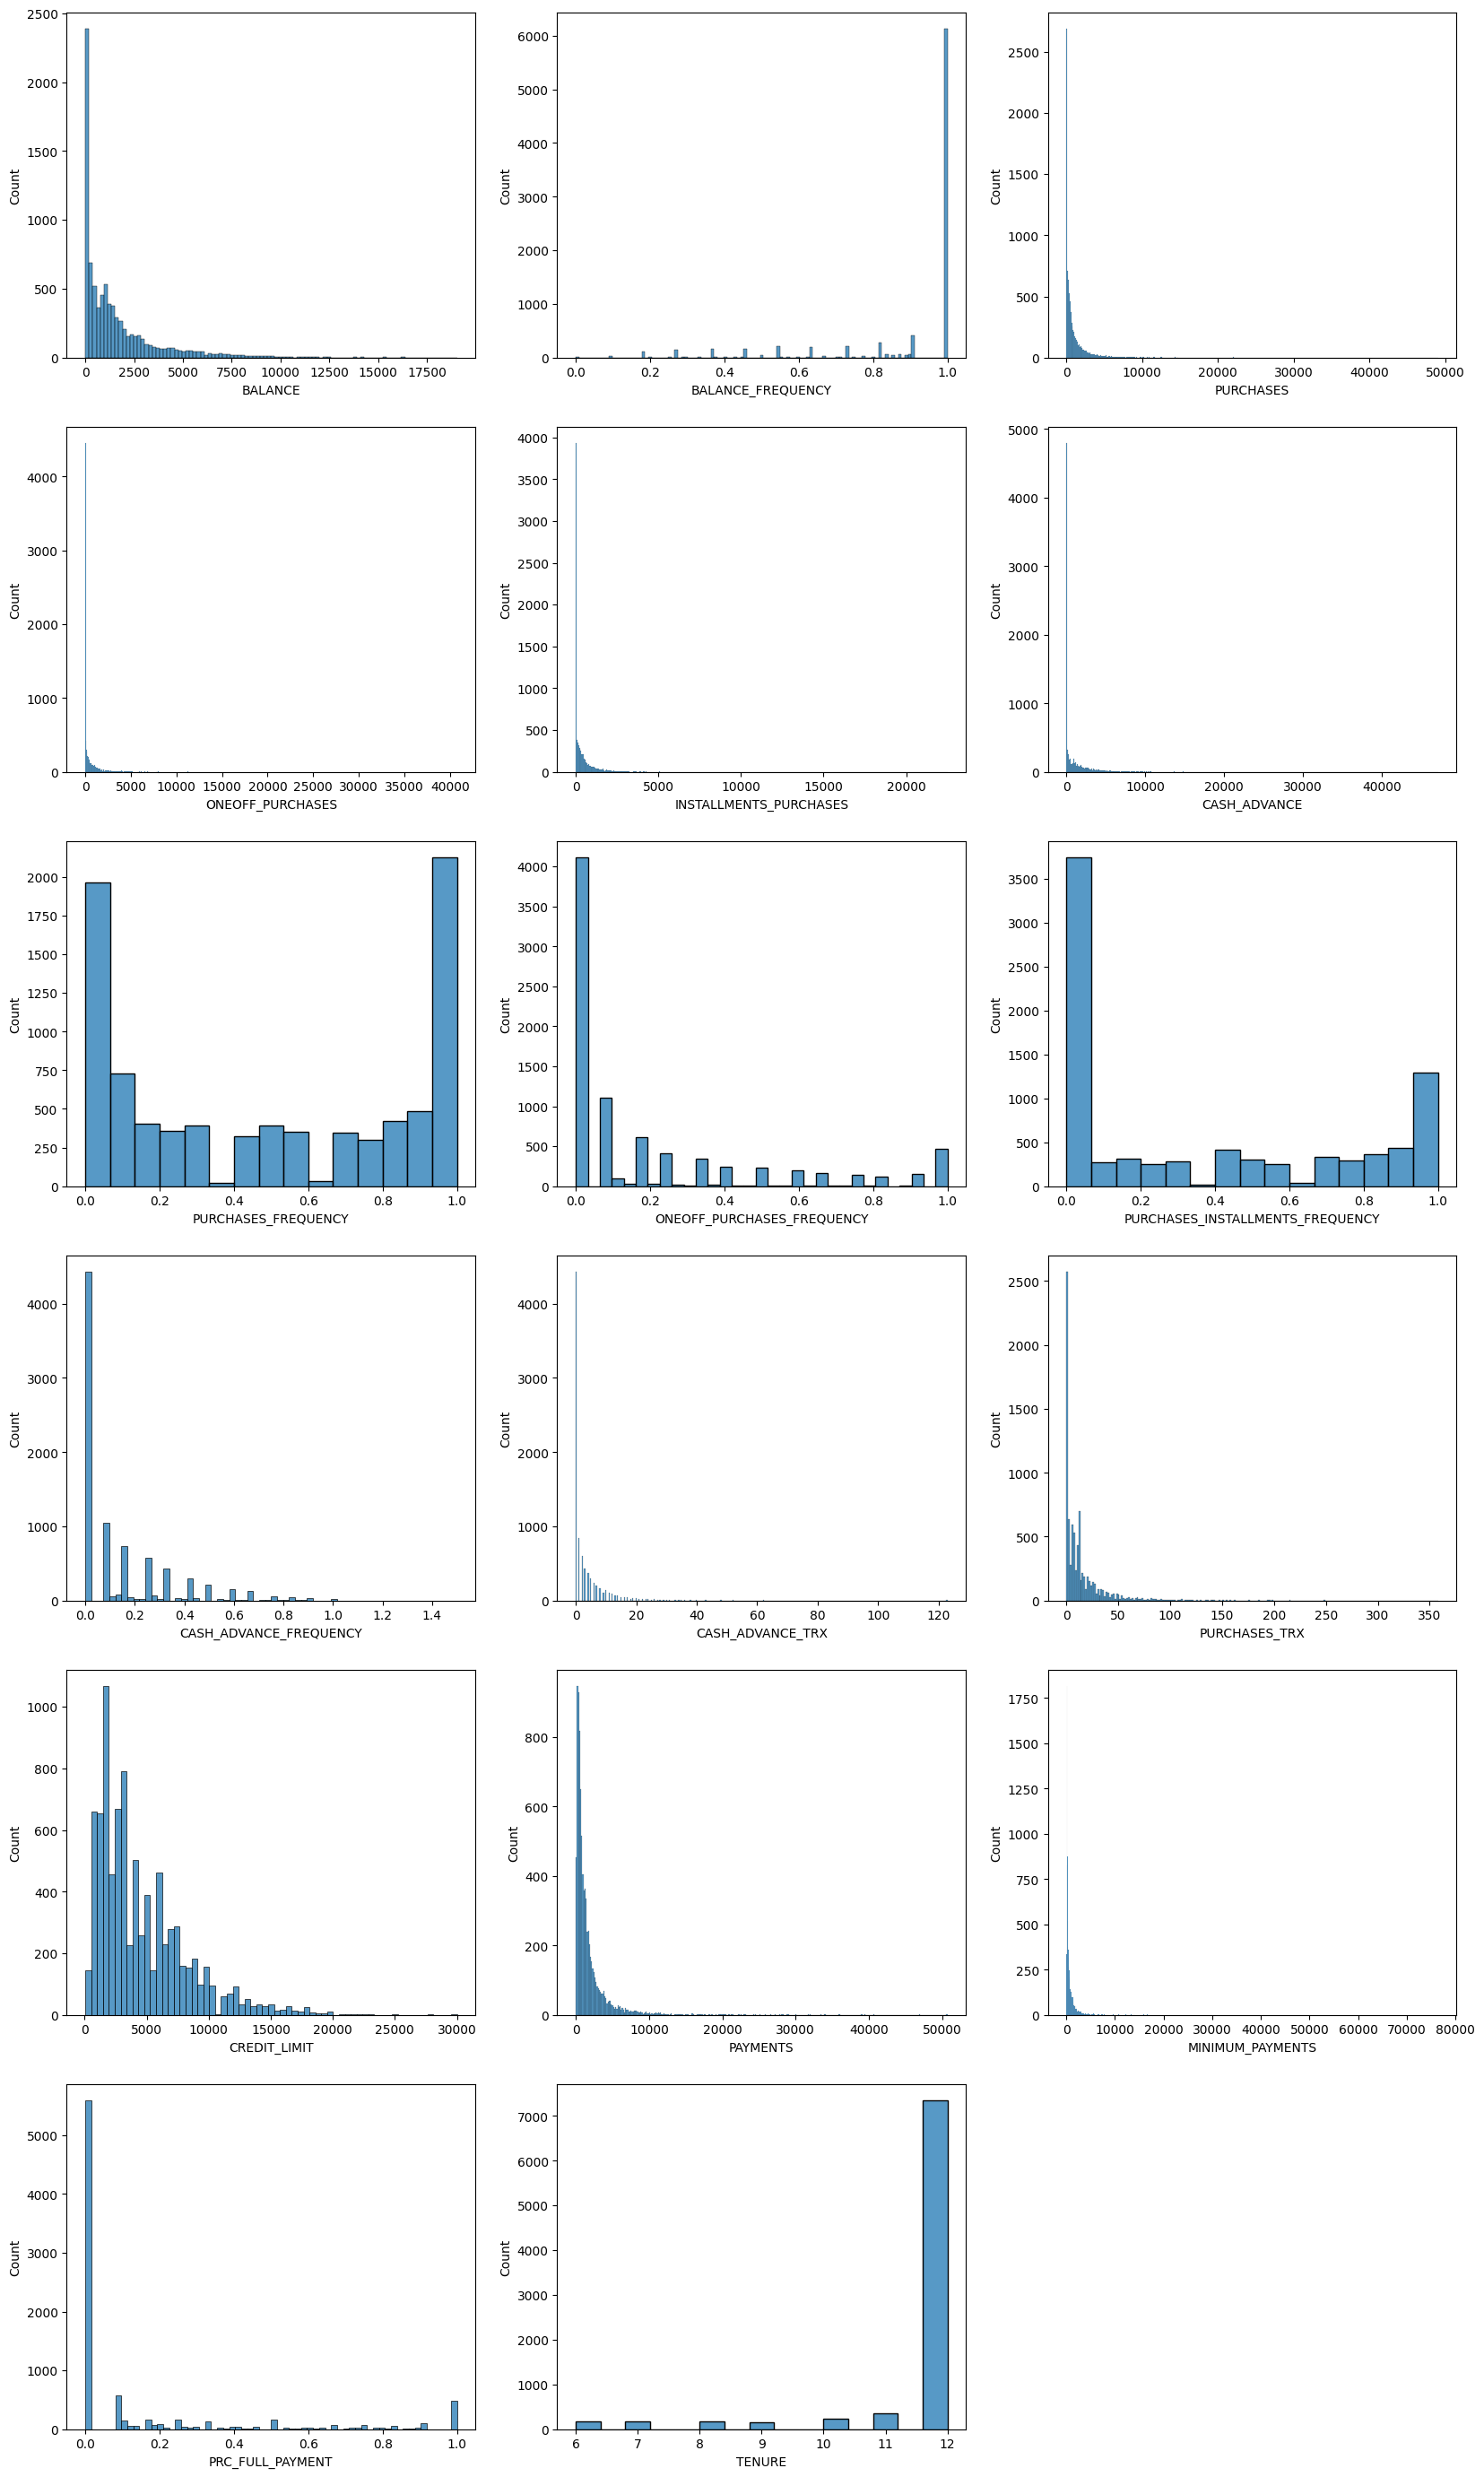

In [10]:
plt.figure(figsize=(20,35))
for i, col in enumerate(df.columns):
        ax = plt.subplot(6, 3, i+1)
        sns.histplot(df[col] , ax=ax)
        plt.xlabel(col)

plt.show()

# Univariate analysis

## BALANCE

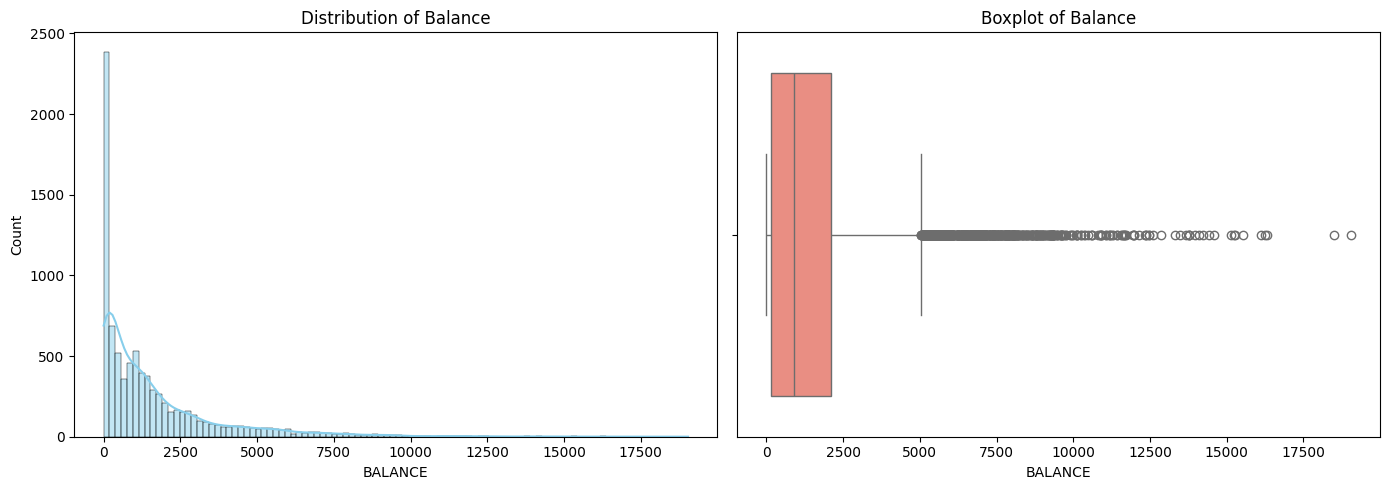

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot distribution using histplot
sns.histplot(df['BALANCE'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Balance')

# Plot boxplot
sns.boxplot(x=df['BALANCE'], ax=axes[1], color='salmon')
axes[1].set_title('Boxplot of Balance')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

### Almost 75% of the pepoule have balance under 2500

In [13]:
percentage = (df[df['BALANCE'] > 7000].shape[0] / df.shape[0]) * 100
percentage

3.2190829087540527

### 3.22 % of Custumers have palnce greter than 7000 $

## BALANCE_FREQUENCY

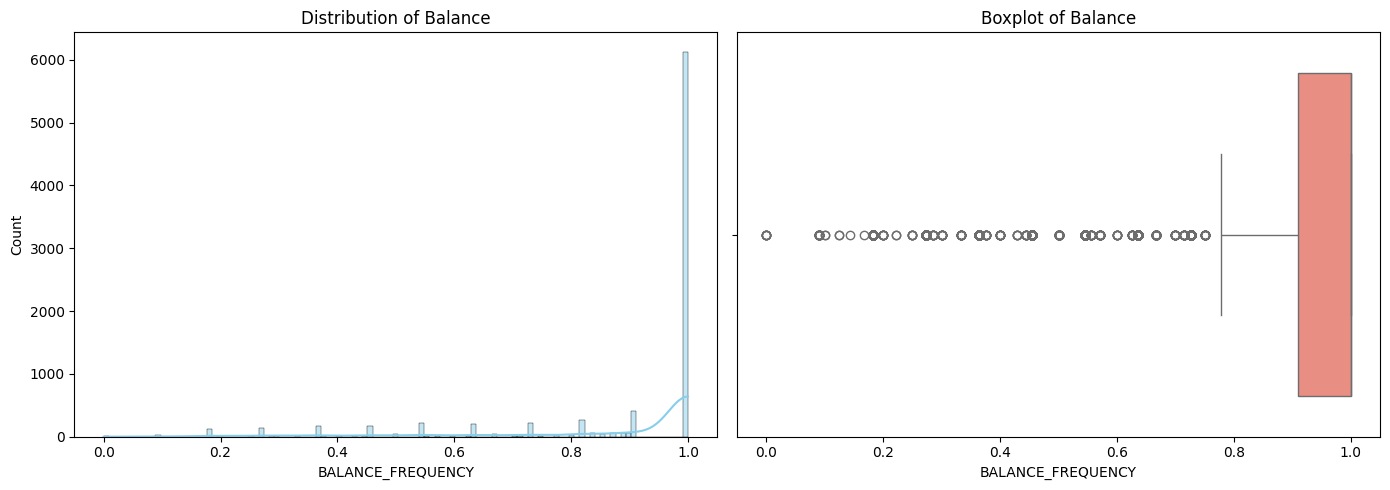

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(df['BALANCE_FREQUENCY'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Balance')

sns.boxplot(x=df['BALANCE_FREQUENCY'], ax=axes[1], color='salmon')
axes[1].set_title('Boxplot of Balance')

plt.tight_layout()

plt.show()


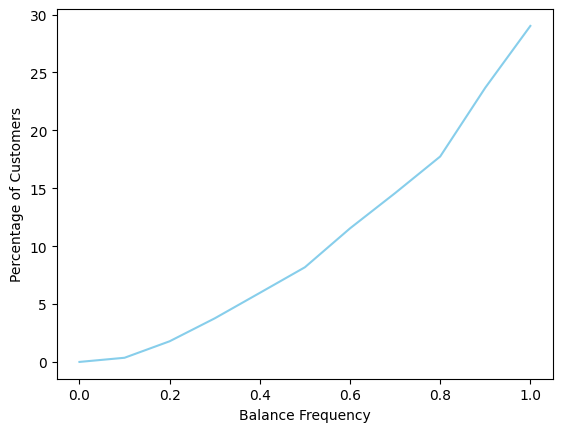

In [14]:
percentage = (df[df['BALANCE_FREQUENCY'] < 0.6].shape[0] / df.shape[0]) * 100

percentages = np.arange(0, 1.1, 0.1)

customerPercentages = [df[df['BALANCE_FREQUENCY'] < i].shape[0] / df.shape[0] * 100 for i in percentages]

sns.lineplot(x=percentages, y=customerPercentages, color='skyblue')

plt.xlabel('Balance Frequency')
plt.ylabel('Percentage of Customers')

plt.show()


In [15]:
percentage = (df[df['BALANCE_FREQUENCY'] < 1].shape[0] / df.shape[0]) * 100
percentage


29.01806391848078

### 61 % of the customers frequently change ther palance
### It makes sense to clip the date into 0 and 1 with

## PURCHASES

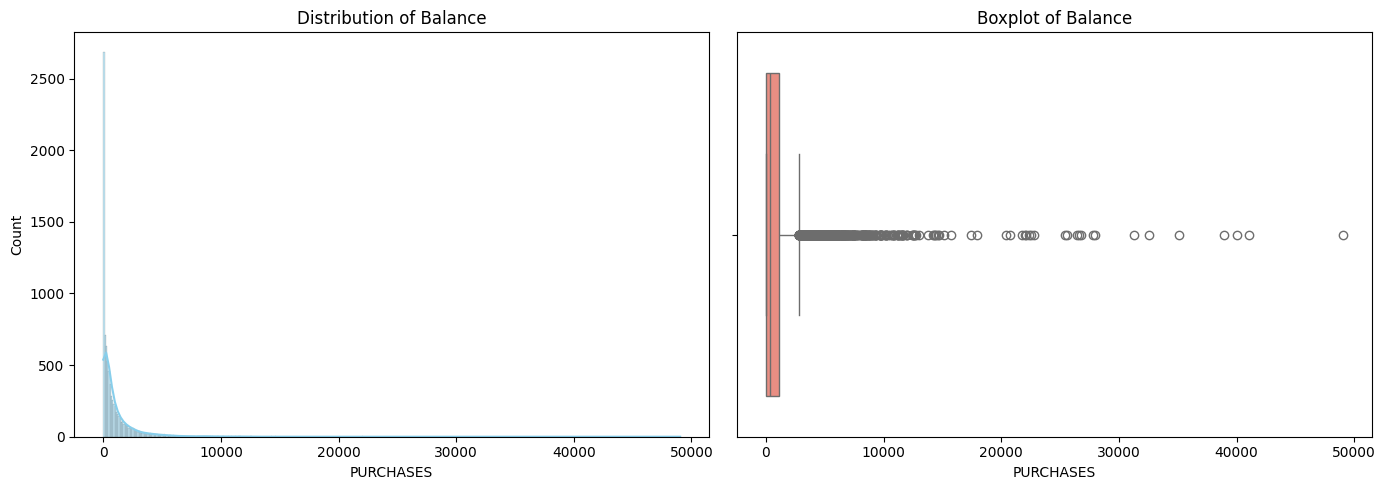

In [18]:

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot distribution using histplot
sns.histplot(df['PURCHASES'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Balance')

# Plot boxplot
sns.boxplot(x=df['PURCHASES'], ax=axes[1], color='salmon')
axes[1].set_title('Boxplot of Balance')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [19]:
percentage = (df[df['PURCHASES'] > 5000].shape[0] / df.shape[0]) * 100
percentage

3.33487725798981

### 3.33 % of Custumers have PURCHASES palnce greter than 5000 $

## INSTALLMENTS_PURCHASES

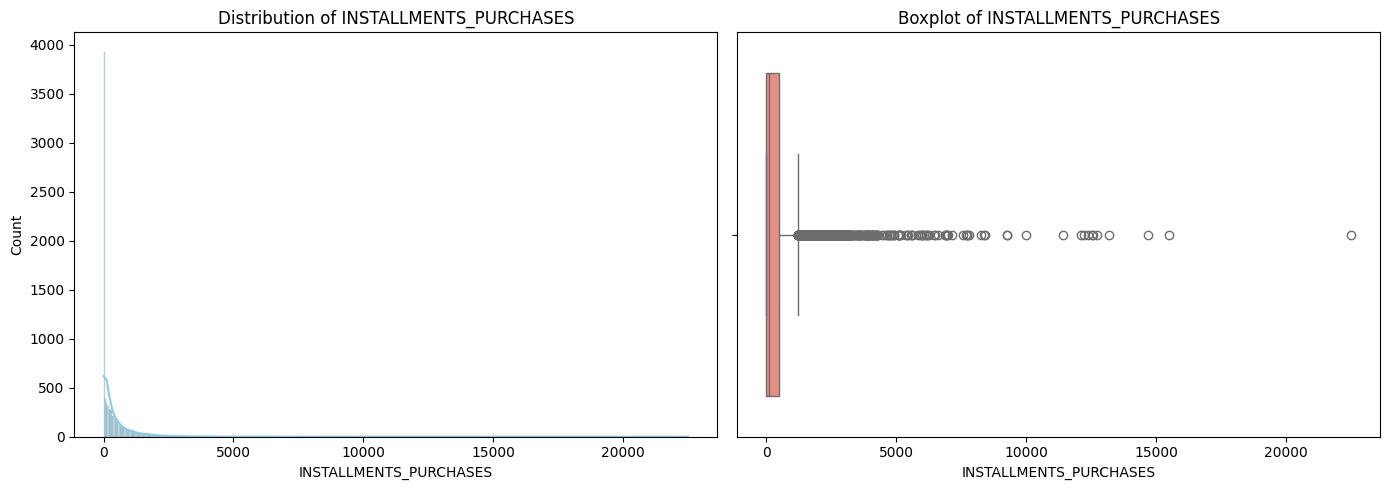

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(df['INSTALLMENTS_PURCHASES'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of INSTALLMENTS_PURCHASES')

sns.boxplot(x=df['INSTALLMENTS_PURCHASES'], ax=axes[1], color='salmon')
axes[1].set_title('Boxplot of INSTALLMENTS_PURCHASES')

plt.tight_layout()
plt.show()


In [23]:
percentage = (df[df['INSTALLMENTS_PURCHASES'] > 2000].shape[0] / df.shape[0]) * 100
percentage

3.983325613710051

### 3.98 % of Custumers have INSTALLMENTS_PURCHASES palnce greter than 2000 $

## ONEOFF_PURCHASES

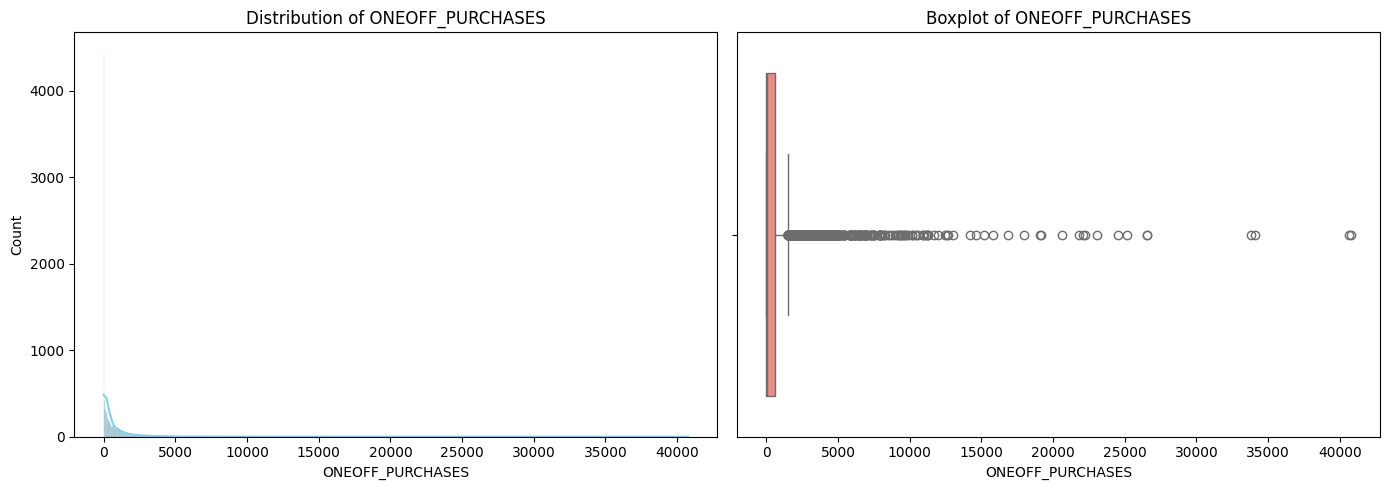

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(df['ONEOFF_PURCHASES'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of ONEOFF_PURCHASES')

sns.boxplot(x=df['ONEOFF_PURCHASES'], ax=axes[1], color='salmon')
axes[1].set_title('Boxplot of ONEOFF_PURCHASES')

plt.tight_layout()
plt.show()


In [27]:
percentage = (df[df['ONEOFF_PURCHASES'] < 2000].shape[0] / df.shape[0]) * 100
percentage

92.05650764242705

### 88 % of custmer have ONEOFF_PURCHASES under 1500

## PURCHASES_FREQUENCY

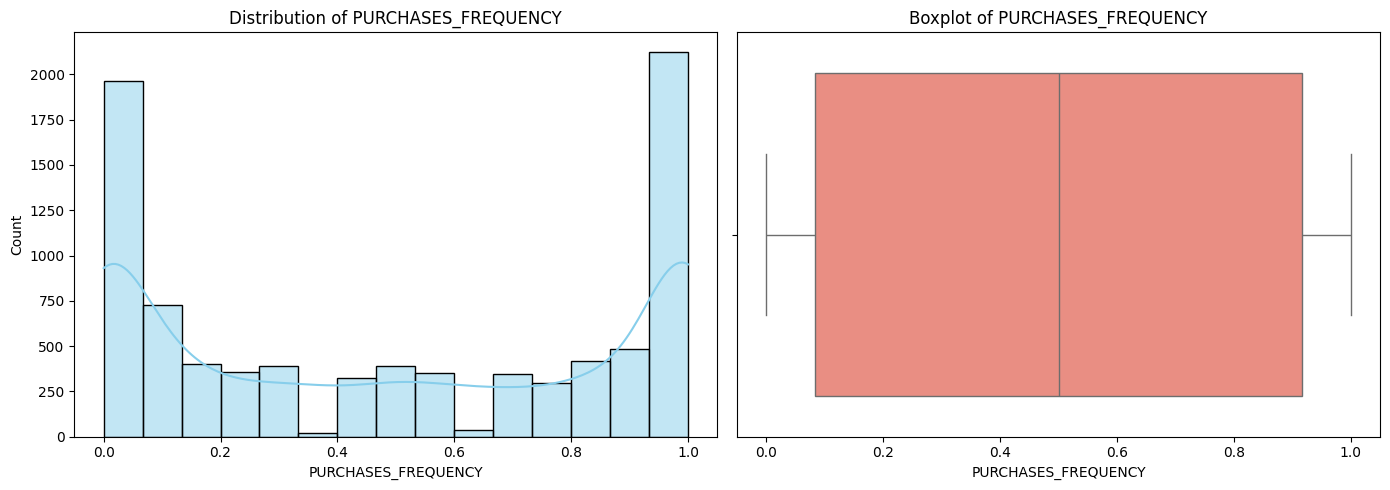

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(df['PURCHASES_FREQUENCY'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of PURCHASES_FREQUENCY')

sns.boxplot(x=df['PURCHASES_FREQUENCY'], ax=axes[1], color='salmon')
axes[1].set_title('Boxplot of PURCHASES_FREQUENCY')

plt.tight_layout()
plt.show()


## ONEOFF_PURCHASES_FREQUENCY

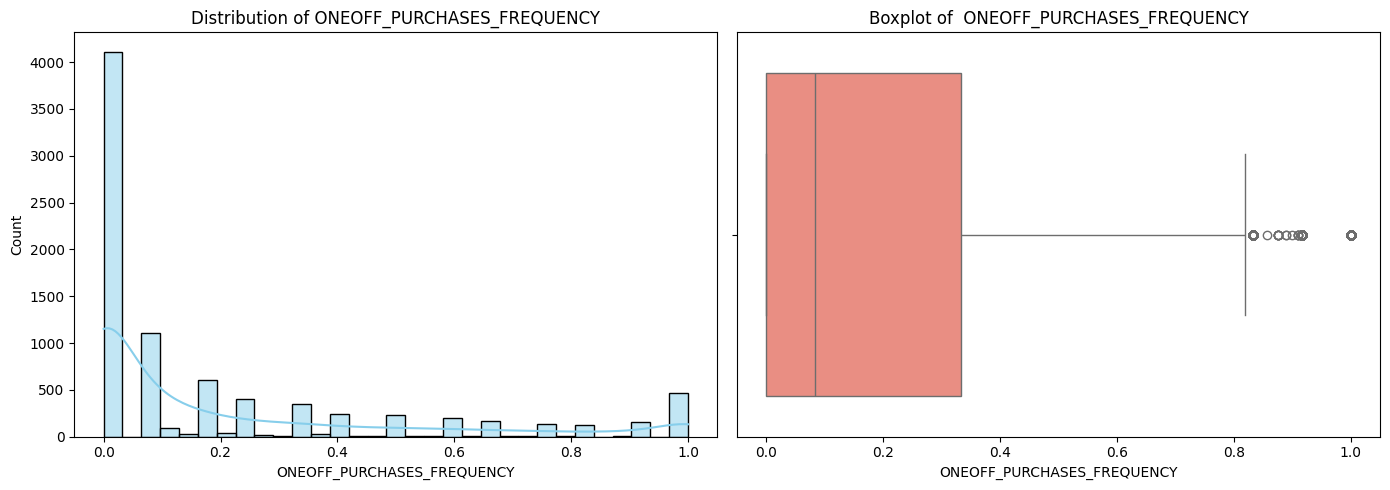

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(df['ONEOFF_PURCHASES_FREQUENCY'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of ONEOFF_PURCHASES_FREQUENCY')

sns.boxplot(x=df['ONEOFF_PURCHASES_FREQUENCY'], ax=axes[1], color='salmon')
axes[1].set_title('Boxplot of  ONEOFF_PURCHASES_FREQUENCY')

plt.tight_layout()
plt.show()


### ONEOFF_PURCHASES_FREQUENCY is right skewed with make sense as most of the customers are not making one off purchases frequently and at 1 the is a rise in the number of customers who are making one off purchases frequently

## PURCHASES_INSTALLMENTS_FREQUENCY

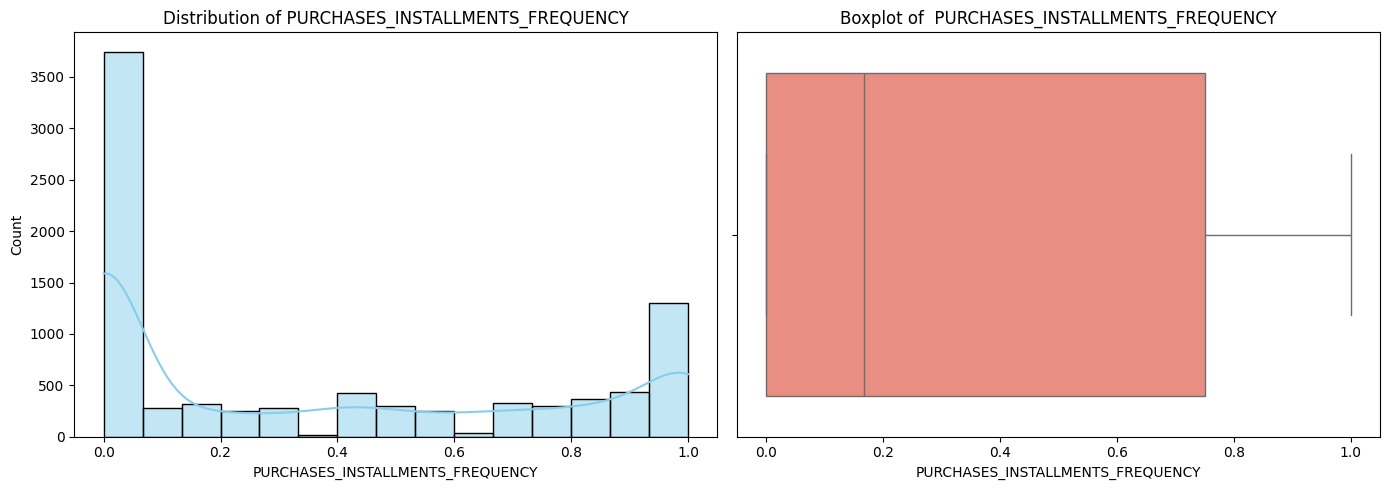

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(df['PURCHASES_INSTALLMENTS_FREQUENCY'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of PURCHASES_INSTALLMENTS_FREQUENCY')

sns.boxplot(x=df['PURCHASES_INSTALLMENTS_FREQUENCY'], ax=axes[1], color='salmon')
axes[1].set_title('Boxplot of  PURCHASES_INSTALLMENTS_FREQUENCY')

plt.tight_layout()
plt.show()



### Taht is same as PURCHASES_FREQUENCY but PURCHASES_FREQUENCY hase significant raise at 1

##  PURCHASES_TRX

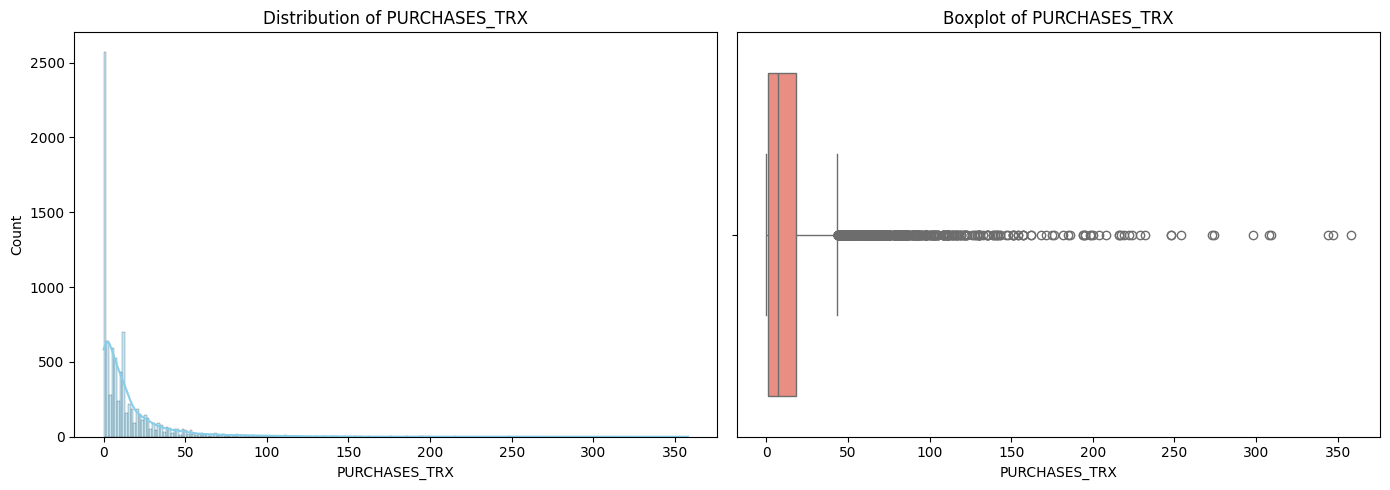

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(df['PURCHASES_TRX'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of PURCHASES_TRX')

sns.boxplot(x=df['PURCHASES_TRX'], ax=axes[1], color='salmon')
axes[1].set_title('Boxplot of PURCHASES_TRX')

plt.tight_layout()
plt.show()


In [34]:
percentage = (df[df['PURCHASES_TRX'] > 40].shape[0] / df.shape[0]) * 100
percentage

9.147753589624827

## CASH_ADVANCE

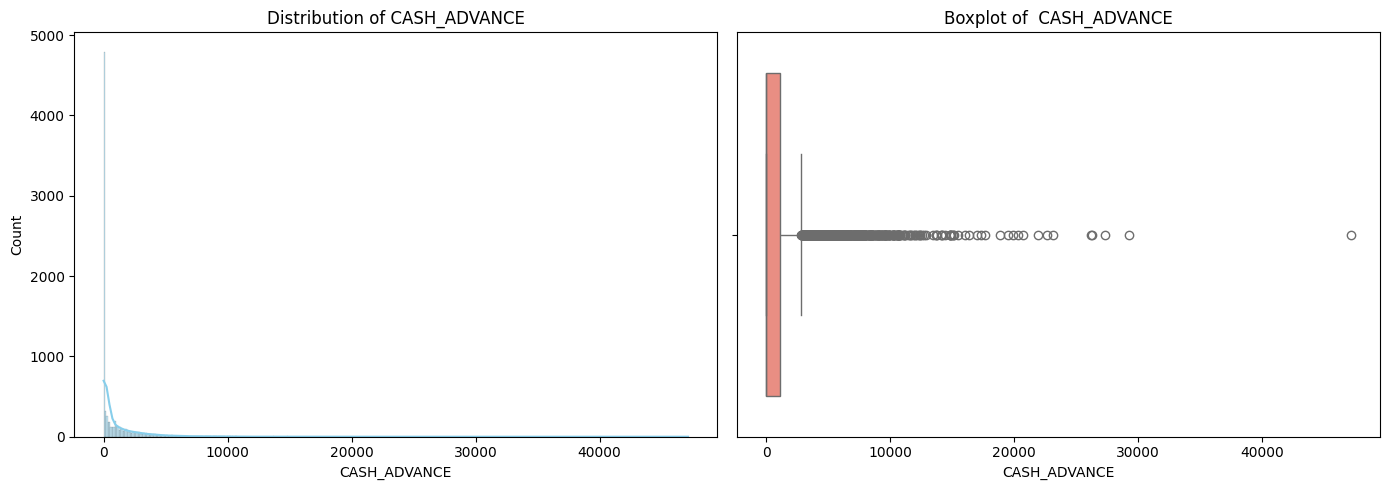

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(df['CASH_ADVANCE'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of CASH_ADVANCE')

sns.boxplot(x=df['CASH_ADVANCE'], ax=axes[1], color='salmon')
axes[1].set_title('Boxplot of  CASH_ADVANCE')

plt.tight_layout()
plt.show()

## 16.53 % of CASH_ADVANCE is greter than 2000

## CASH_ADVANCE_FREQUENCY

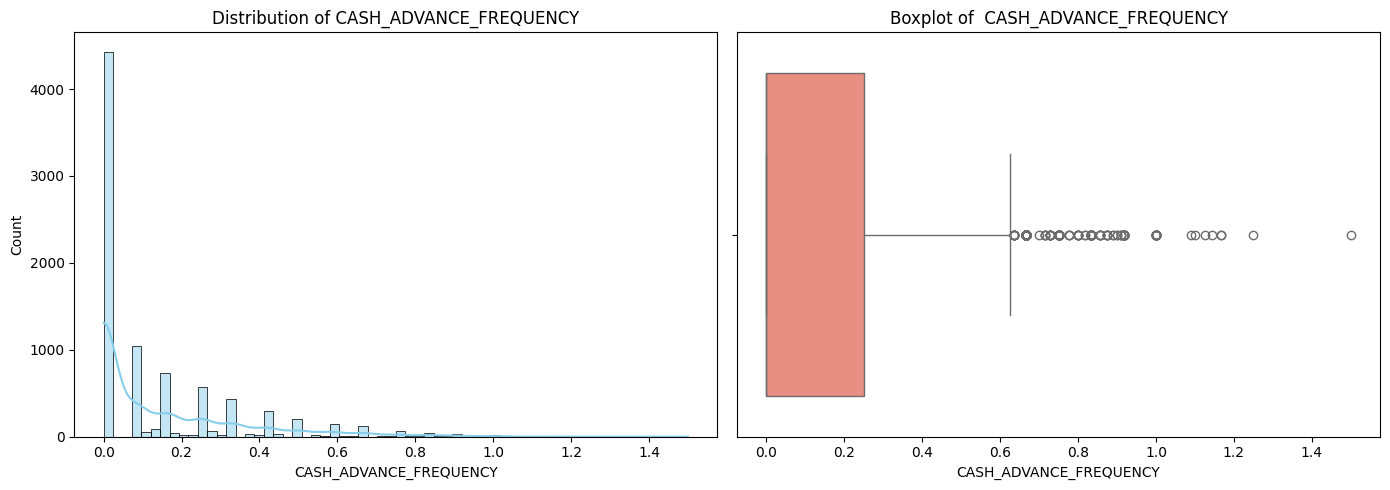

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(df['CASH_ADVANCE_FREQUENCY'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of CASH_ADVANCE_FREQUENCY')

sns.boxplot(x=df['CASH_ADVANCE_FREQUENCY'], ax=axes[1], color='salmon')
axes[1].set_title('Boxplot of  CASH_ADVANCE_FREQUENCY')

plt.tight_layout()
plt.show()

In [42]:
percentage = (df[df['CASH_ADVANCE_FREQUENCY'] > 0.5].shape[0] / df.shape[0]) * 100
percentage

6.148679944418713

## CASH_ADVANCE_TRX

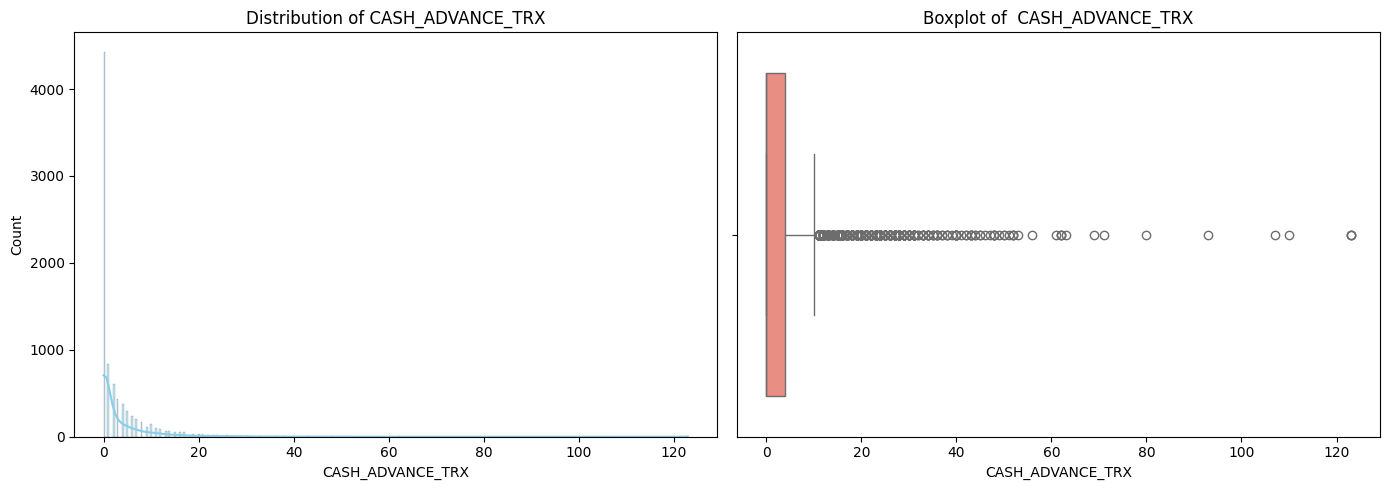

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(df['CASH_ADVANCE_TRX'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of CASH_ADVANCE_TRX')

sns.boxplot(x=df['CASH_ADVANCE_TRX'], ax=axes[1], color='salmon')
axes[1].set_title('Boxplot of  CASH_ADVANCE_TRX')

plt.tight_layout()
plt.show()

In [46]:
percentage = (df[df['CASH_ADVANCE_TRX'] > 10].shape[0] / df.shape[0]) * 100
percentage

9.19407132931913

### 89 % of CASH_ADVANCE_TRX is greter than 10 so I will clip it to 10

## CREDIT_LIMIT

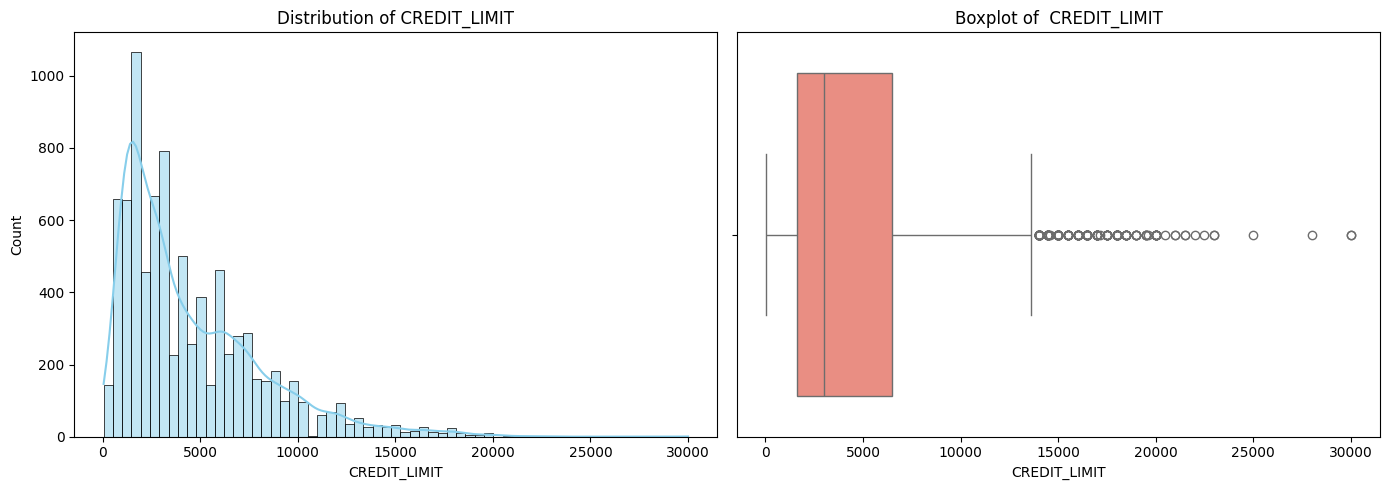

In [49]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(df['CREDIT_LIMIT'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of CREDIT_LIMIT')

sns.boxplot(x=df['CREDIT_LIMIT'], ax=axes[1], color='salmon')
axes[1].set_title('Boxplot of  CREDIT_LIMIT')

plt.tight_layout()
plt.show()

In [50]:
percentage = (df[df['CREDIT_LIMIT'] > 10000].shape[0] / df.shape[0]) * 100
percentage

7.816118573413617

### 92.22 % of the CREDIT_LIMIT is greter than 10000

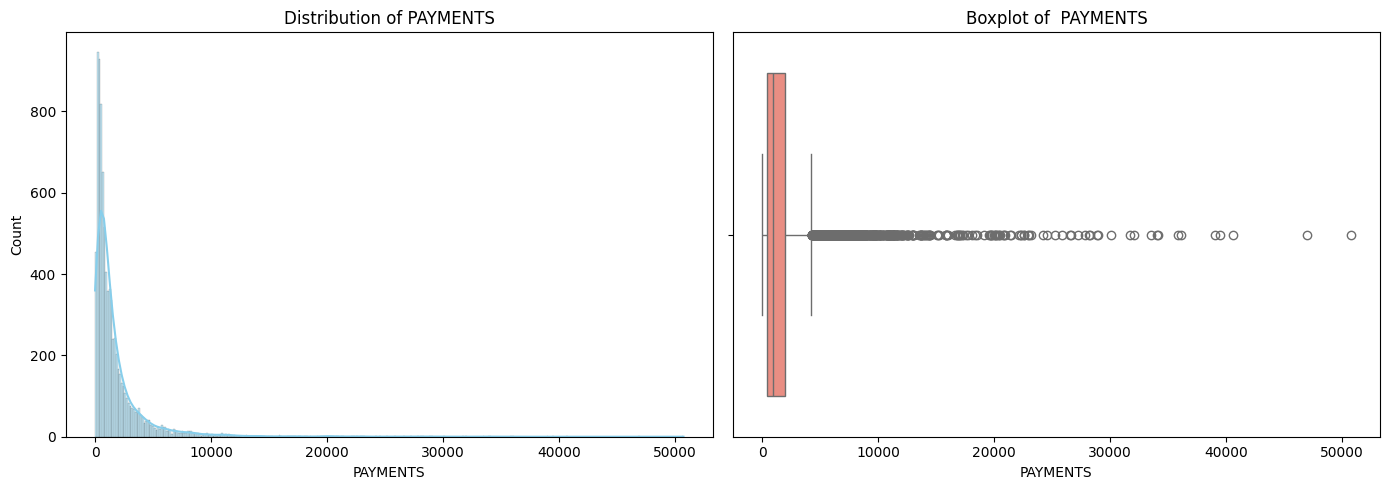

In [53]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(df['PAYMENTS'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of PAYMENTS')

sns.boxplot(x=df['PAYMENTS'], ax=axes[1], color='salmon')
axes[1].set_title('Boxplot of  PAYMENTS')

plt.tight_layout()
plt.show()

In [54]:
percentage = (df[df['PAYMENTS'] > 4000].shape[0] / df.shape[0]) * 100
percentage

10.027790643816582

### 90 % of PAYMENTS is greter than 4000

## MINIMUM_PAYMENTS

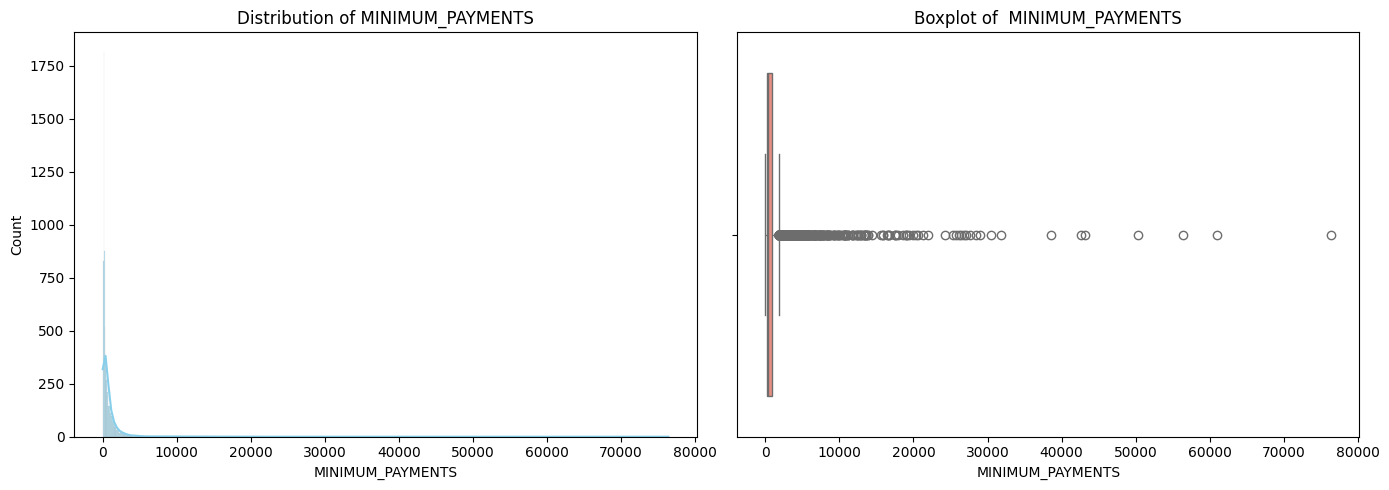

In [57]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(df['MINIMUM_PAYMENTS'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of MINIMUM_PAYMENTS')

sns.boxplot(x=df['MINIMUM_PAYMENTS'], ax=axes[1], color='salmon')
axes[1].set_title('Boxplot of  MINIMUM_PAYMENTS')
plt.tight_layout()
plt.show()

In [58]:
percentage = (df[df['MINIMUM_PAYMENTS'] > 1700].shape[0] / df.shape[0]) * 100
percentage


10.641500694766096

## 10.64 % of customers have MINIMUM_PAYMENTS greter than 1700

In [61]:
df.describe()

BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
count  8636.000000        8636.000000  8636.000000       8636.000000   
mean   1530.530975           0.956264   881.769827        366.182619   
std    1821.019942           0.105873  1237.356108        528.267375   
min       0.000000           0.700000     0.000000          0.000000   
25%     148.095189           1.000000    43.367500          0.000000   
50%     916.855459           1.000000   375.405000         44.995000   
75%    2105.195853           1.000000  1145.980000        599.100000   
max    7000.000000           1.000000  5000.000000       1500.000000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8636.000000   8636.000000          8636.000000   
mean               354.981154    569.525282             0.496000   
std                535.991528    787.195014             0.401273   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 94.785000      0.000000             0.500000   
75%                484.147500   1132.385490             0.916667   
max               2000.000000   2000.000000             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8636.000000                       8636.000000   
mean                     0.205909                          0.368820   
std                      0.300054                          0.398093   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.333333                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8636.000000       8636.000000    8636.000000   8636.000000   
mean                 0.155640          2.422418      11.752779   4251.890705   
std                  0.255048          3.439493      12.929568   2961.903289   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.250000          4.000000      18.000000   6500.000000   
max                  1.000000         10.000000      40.000000  10000.000000   

          PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count  8636.000000       8636.000000       8636.000000  8636.000000  
mean   1372.373966        564.033050          0.159304    11.534391  
std    1232.903057        536.170671          0.296271     1.310984  
min       0.049513          0.019163          0.000000     6.000000  
25%     418.559237        169.163545          0.000000    12.000000  
50%     896.675701        312.452292          0.000000    12.000000  
75%    1951.142090        825.496463          0.166667    12.000000  
max    4000.000000       1700.000000          1.000000    12.000000

## PRC_FULL_PAYMENT

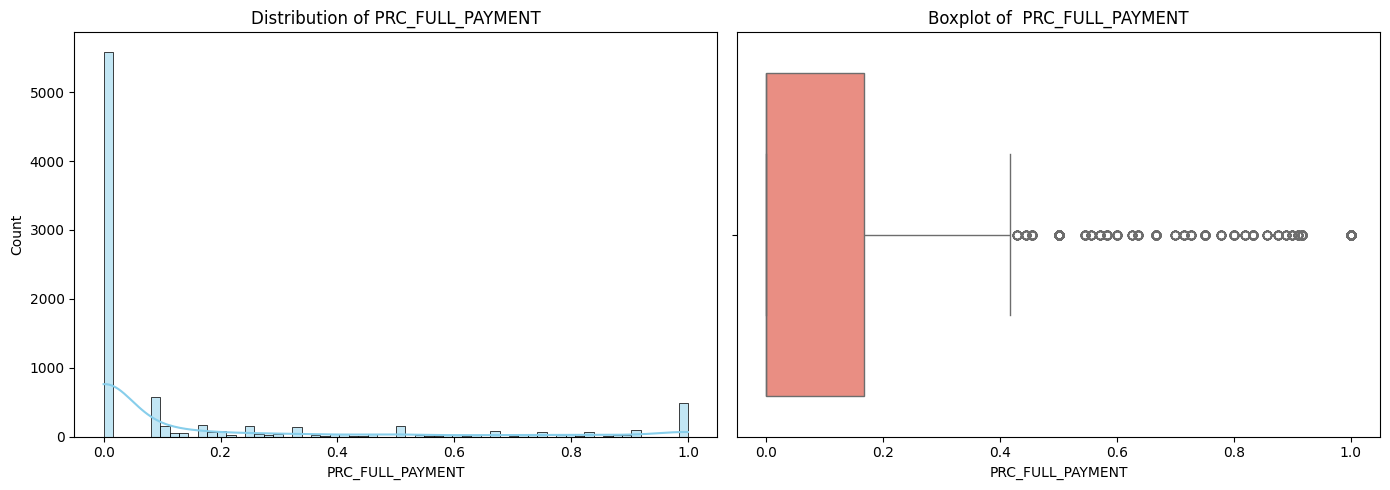

In [62]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(df['PRC_FULL_PAYMENT'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of PRC_FULL_PAYMENT')

sns.boxplot(x=df['PRC_FULL_PAYMENT'], ax=axes[1], color='salmon')
axes[1].set_title('Boxplot of  PRC_FULL_PAYMENT')
plt.tight_layout()
plt.show()

In [63]:
percentage = (df[df['PRC_FULL_PAYMENT'] == 0].shape[0] / df.shape[0]) * 100
percentage


64.71746178786475

## TENURE

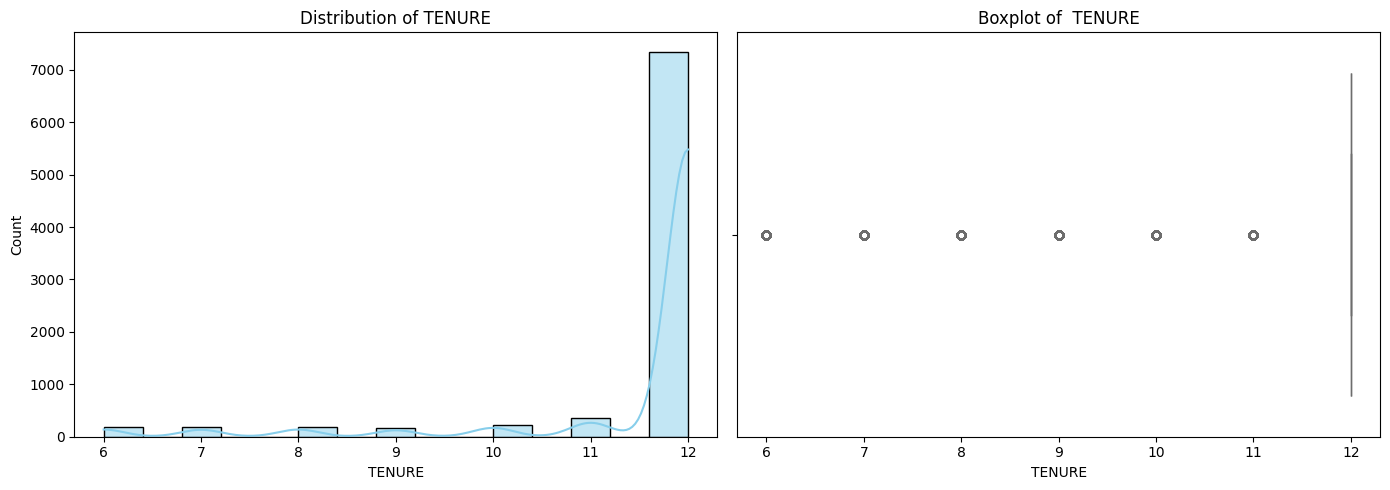

In [64]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(df['TENURE'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of TENURE')

sns.boxplot(x=df['TENURE'], ax=axes[1], color='salmon')
axes[1].set_title('Boxplot of  TENURE')
plt.tight_layout()
plt.show()

In [65]:
percentage = (df[df['TENURE'] <12].shape[0] / df.shape[0]) * 100
percentage


14.93747105141269

In [66]:
df.drop('TENURE',axis=1,inplace=True)

## TENURE hase very low variance so deop it

## It seams that almost all data has outlayers

# Bivariate Analysis

<Axes: >

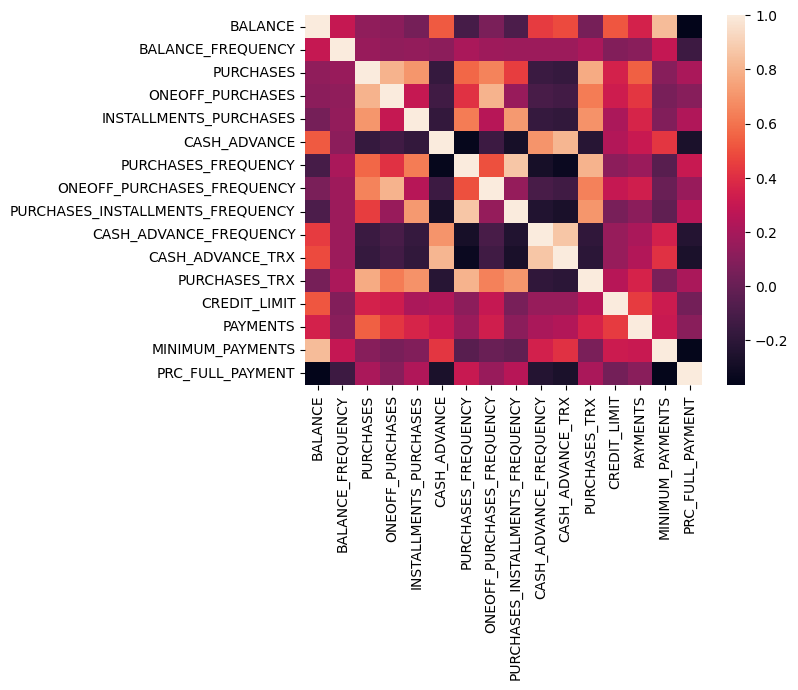

In [68]:
sns.heatmap(df.corr())

<Axes: >

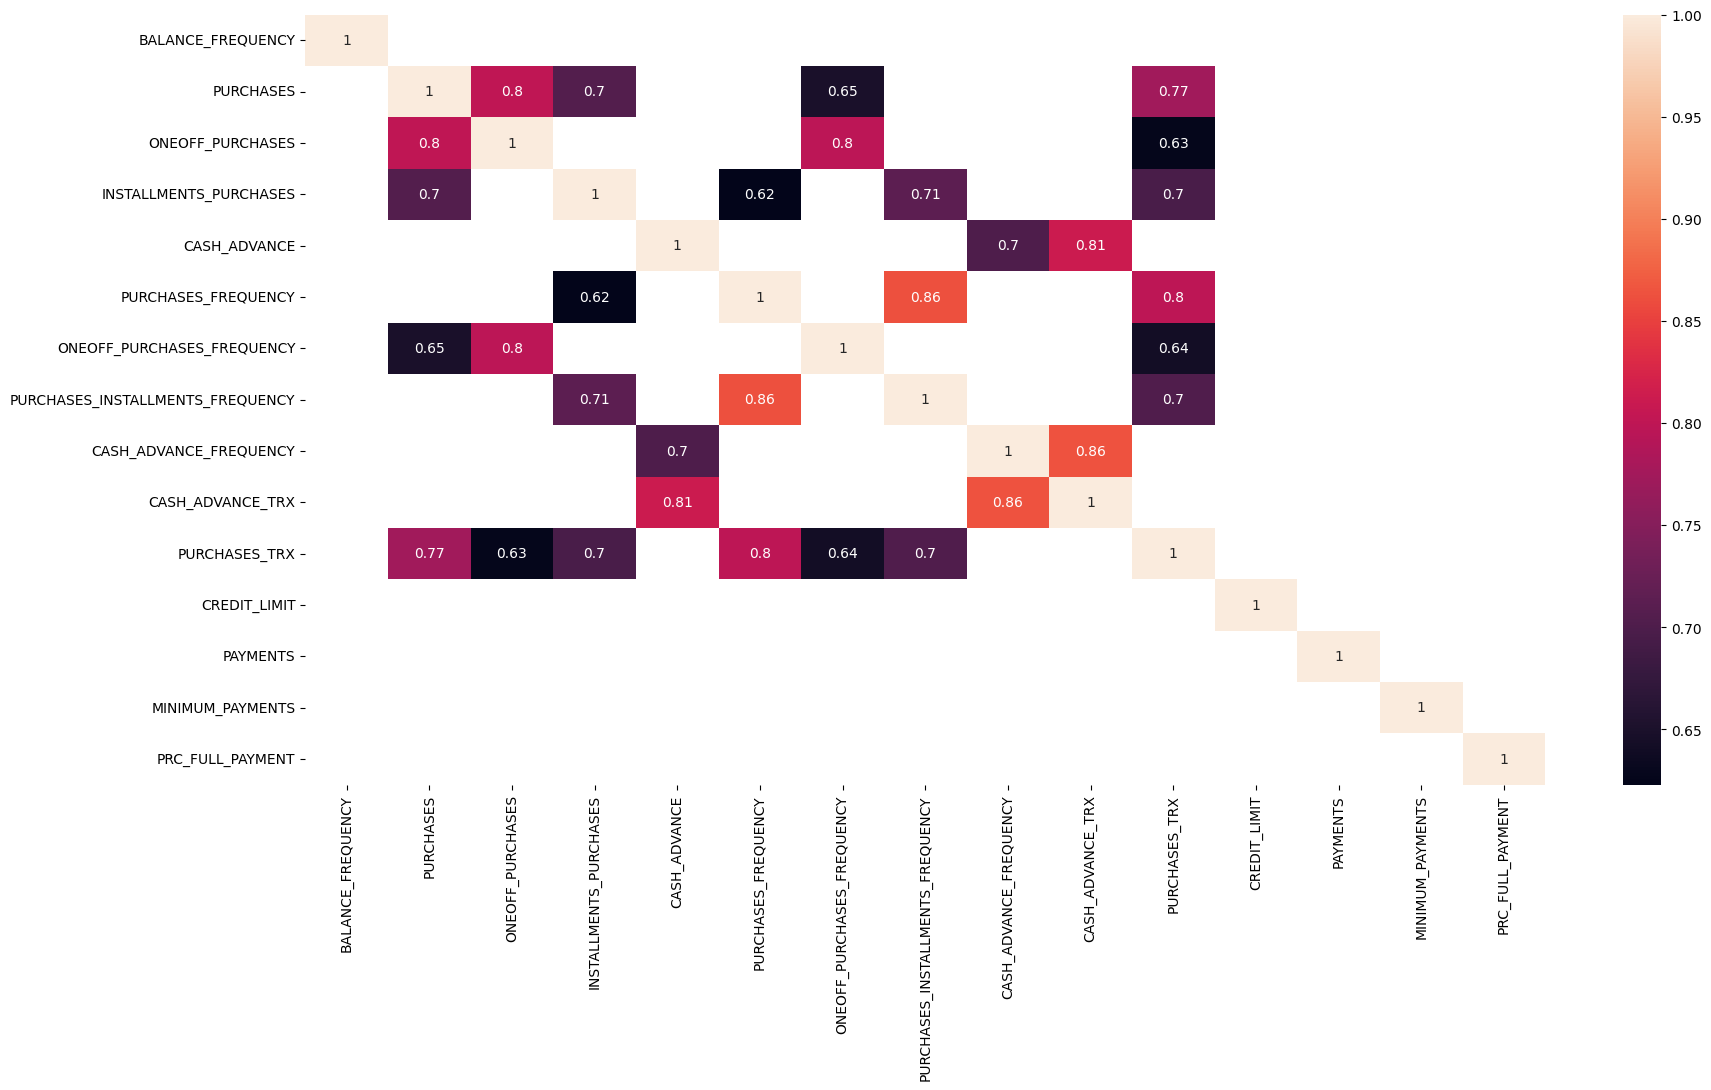

In [69]:
plt.figure(figsize=(20,10))
coorlation = df.iloc[:,1:].corr()
thresh = 0.6
sns.heatmap(coorlation[abs(coorlation) > thresh] , annot=True)

## There are high correlation features but they may has business meaning
### I will use PCA and try Clustering using correlated features and notice the Impact of removing highly correlated features

## 3. <a name="2">Data preprocessing</a>
(<a href="#2">Go to top</a>)


In [70]:
df.duplicated().sum()

5

In [71]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

### Define below all the issues that you had found in the previous part
1-  UnImportant couloumns       >> drop  <br>
2- duplicates data >> drop  <br>
3-  Null Vlaues       >> drop  <br>
4-  Outlayers         >> transformation<br>
5-  Multicollinearity  >>     PCA  <br>

### We have many Corralated Features as Most of them are just another way to represent existing ones like the frequency features.

# 4. <a name="3">Features transformation</a>
(<a href="#0">Go to top</a>)

In [72]:
from sklearn import preprocessing

In [73]:
df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749                1.0      95.40              0.00   
1  3202.467416                1.0       0.00              0.00   
2  2495.148862                1.0     773.17            773.17   
4   817.714335                1.0      16.00             16.00   
5  1809.828751                1.0    1333.28              0.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   95.40           0.0             0.166667   
1                    0.00        2000.0             0.000000   
2                    0.00           0.0             1.000000   
4                    0.00           0.0             0.083333   
5                 1333.28           0.0             0.666667   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
4                    0.083333                          0.000000   
5                    0.000000                          0.583333   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                    0.00                 0              2        1000.0   
1                    0.25                 4              0        7000.0   
2                    0.00                 0             12        7500.0   
4                    0.00                 0              1        1200.0   
5                    0.00                 0              8        1800.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  
0   201.802084        139.509787          0.000000  
1  4000.000000       1072.340217          0.222222  
2   622.066742        627.284787          0.000000  
4   678.334763        244.791237          0.000000  
5  1400.057770       1700.000000          0.000000

In [74]:
colounms=[]
frequencyColounms=[]
for col in df.columns:

    esries = df[col]
    if esries.max()>1 and col:
        colounms.append(col)
    else:
        frequencyColounms.append(col)
frequencyData = df[frequencyColounms]
data = df[colounms]

In [75]:
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log1p, validate=True)

df_log_transformed = pd.DataFrame(log_transformer.transform(data ), columns=data.columns)

df_log_specific = pd.DataFrame(log_transformer.transform(data),columns=data.columns)

# Alternatively, you can use the apply method of DataFrame:
df_log_all =data.apply(np.log1p)
df_log_all.head()

BALANCE  PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
0  3.735304   4.568506          0.000000                4.568506   
1  8.071989   0.000000          0.000000                0.000000   
2  7.822504   6.651791          6.651791                0.000000   
4  6.707735   2.833213          2.833213                0.000000   
5  7.501540   7.196147          0.000000                7.196147   

   CASH_ADVANCE  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  PAYMENTS  \
0      0.000000          0.000000       1.098612      6.908755  5.312231   
1      7.601402          1.609438       0.000000      8.853808  8.294300   
2      0.000000          0.000000       2.564949      8.922792  6.434654   
4      0.000000          0.000000       0.693147      7.090910  6.521114   
5      0.000000          0.000000       2.197225      7.496097  7.244983   

   MINIMUM_PAYMENTS  
0          4.945277  
1          6.978531  
2          6.442994  
4          5.504483  
5          7.438972

In [76]:
df_log_all.shape

(8631, 10)

In [77]:
transformed_df = pd.concat([df_log_all, frequencyData], axis=1)
transformed_df

BALANCE  PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
0     3.735304   4.568506          0.000000                4.568506   
1     8.071989   0.000000          0.000000                0.000000   
2     7.822504   6.651791          6.651791                0.000000   
4     6.707735   2.833213          2.833213                0.000000   
5     7.501540   7.196147          0.000000                7.196147   
...        ...        ...               ...                     ...   
8943  1.927413   3.086487          3.086487                0.000000   
8945  3.384170   5.677165          0.000000                5.677165   
8947  3.194529   4.979489          0.000000                4.979489   
8948  2.671218   0.000000          0.000000                0.000000   
8949  5.923475   6.997824          6.997824                0.000000   

      CASH_ADVANCE  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  PAYMENTS  \
0         0.000000          0.000000       1.098612      6.908755  5.312231   
1         7.601402          1.609438       0.000000      8.853808  8.294300   
2         0.000000          0.000000       2.564949      8.922792  6.434654   
4         0.000000          0.000000       0.693147      7.090910  6.521114   
5         0.000000          0.000000       2.197225      7.496097  7.244983   
...            ...               ...            ...           ...       ...   
8943      0.000000          0.000000       0.693147      6.216606  4.088408   
8945      0.000000          0.000000       1.945910      6.908755  5.788719   
8947      0.000000          0.000000       1.791759      6.908755  4.410016   
8948      3.625907          1.098612       0.000000      6.216606  3.980615   
8949      4.852343          1.098612       3.178054      7.090910  4.161464   

      MINIMUM_PAYMENTS  BALANCE_FREQUENCY  PURCHASES_FREQUENCY  \
0             4.945277                1.0             0.166667   
1             6.978531                1.0             0.000000   
2             6.442994                1.0             1.000000   
4             5.504483                1.0             0.083333   
5             7.438972                1.0             0.666667   
...                ...                ...                  ...   
8943          3.794898                0.7             0.166667   
8945          3.909748                1.0             1.000000   
8947          4.423869                1.0             0.833333   
8948          4.038755                1.0             0.000000   
8949          4.491878                0.7             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
4                       0.083333                          0.000000   
5                       0.000000                          0.583333   
...                          ...                               ...   
8943                    0.166667                          0.000000   
8945                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  PRC_FULL_PAYMENT  
0                   0.000000          0.000000  
1                   0.250000          0.222222  
2                   0.000000          0.000000  
4                   0.000000          0.000000  
5                   0.000000          0.000000  
...                      ...               ...  
8943                0.000000          0.000000  
8945                0.000000          0.500000  
8947                0.000000          0.250000  
8948                0.166667          0.250000  
8949                0.333333    

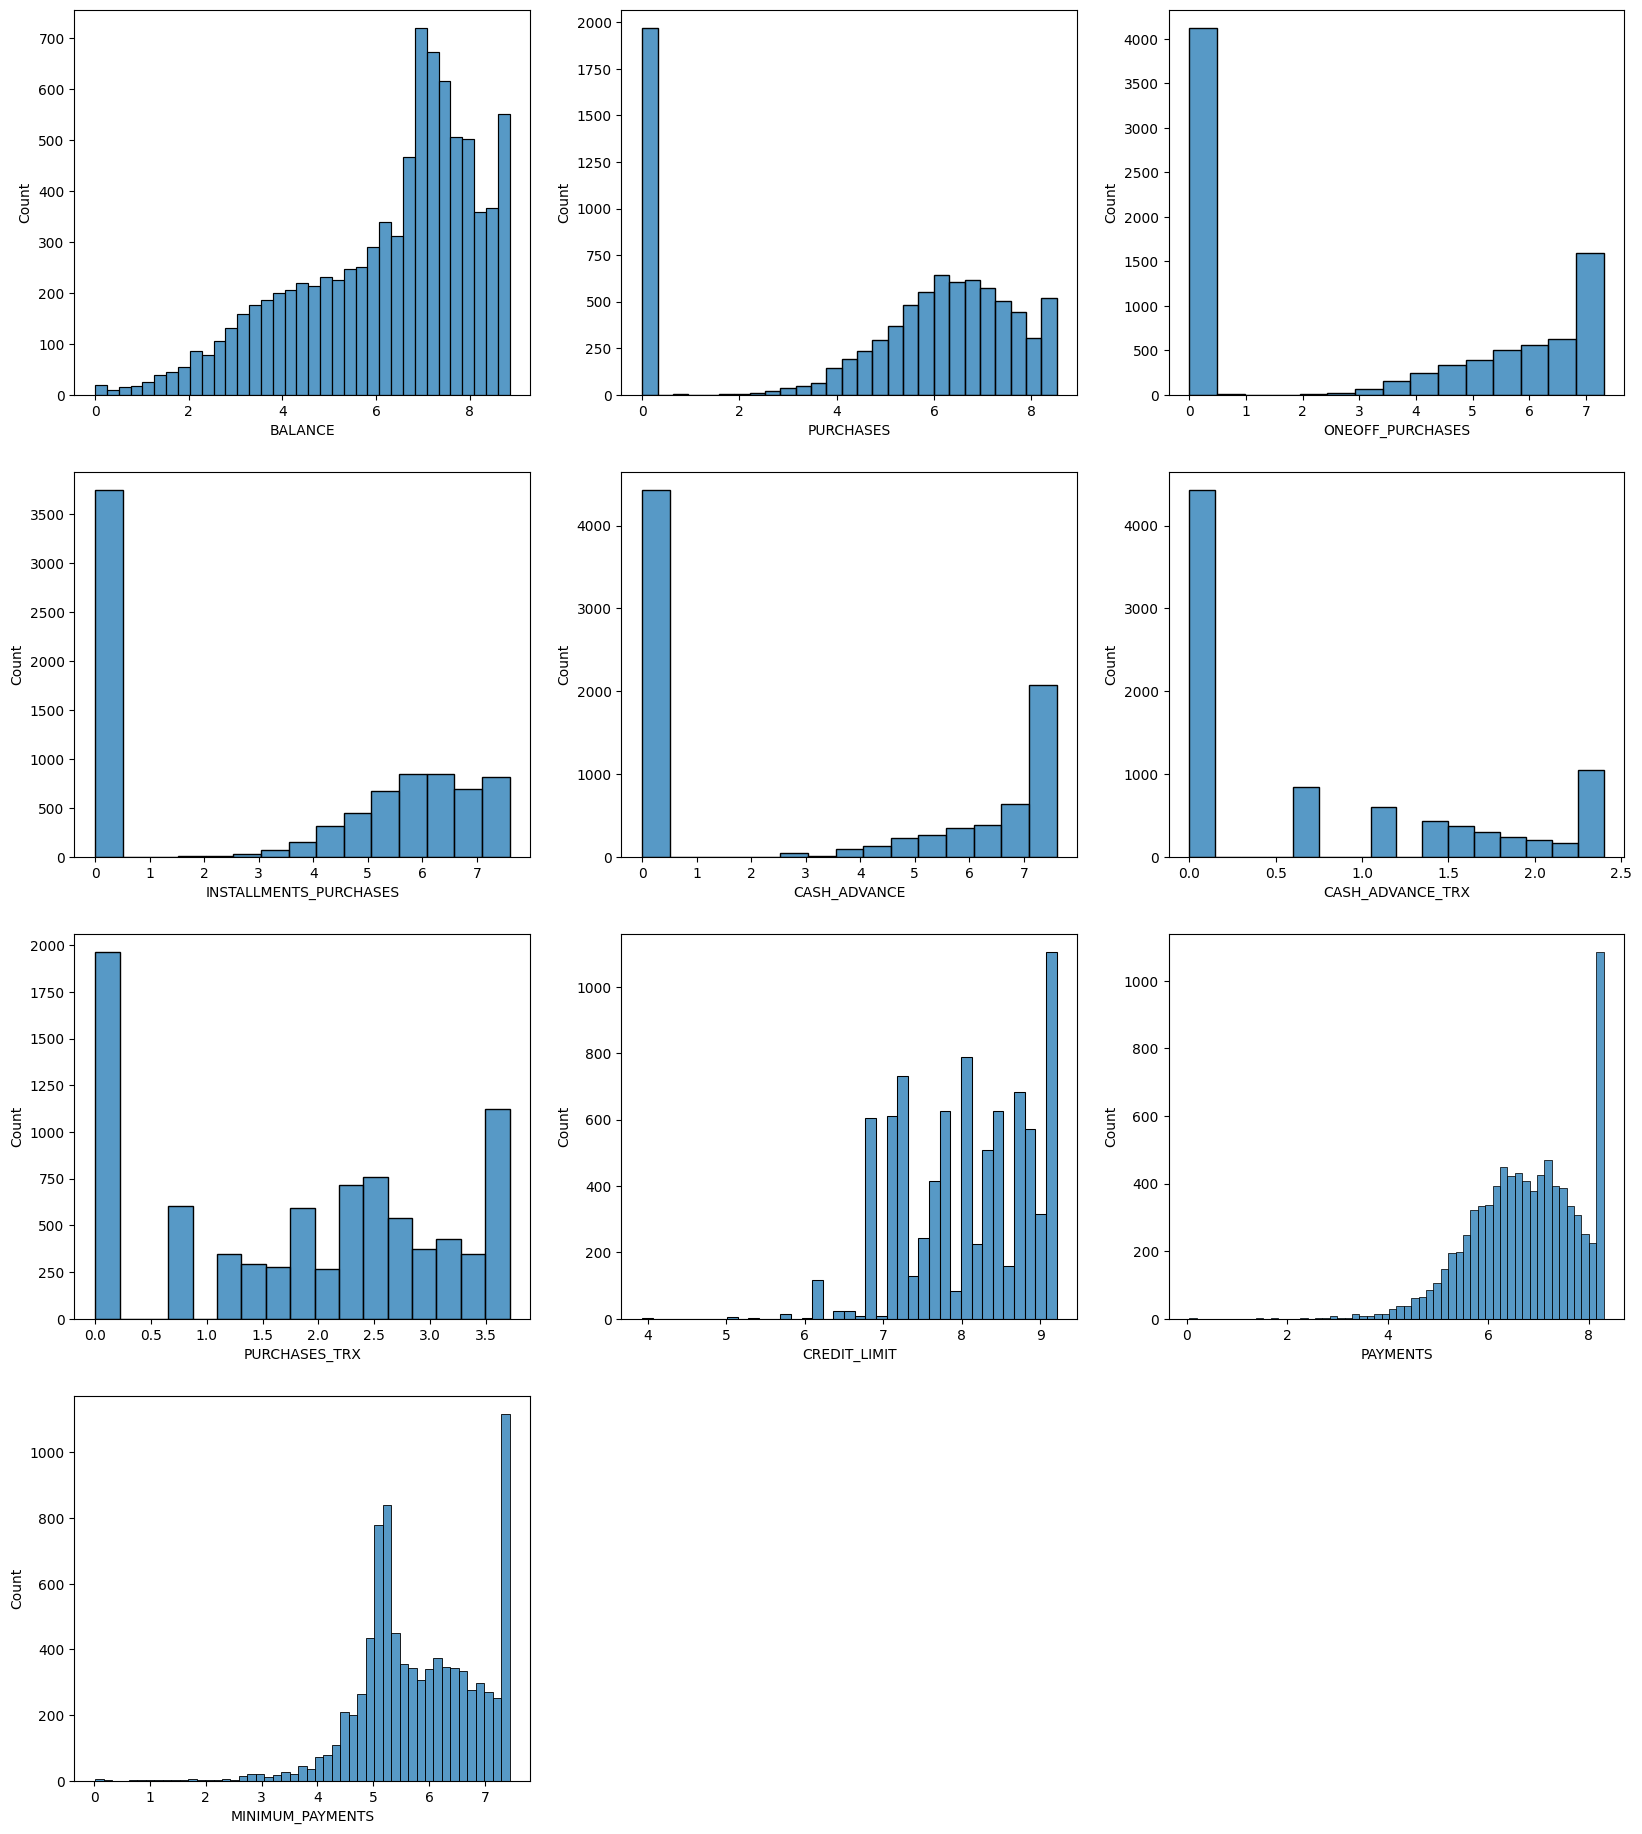

In [78]:
plt.figure(figsize=(20,35))
for i, col in enumerate(df_log_all.columns):
        ax = plt.subplot(6, 3, i+1)
        sns.histplot(df_log_all[col] , ax=ax)
        plt.xlabel(col)

plt.show()

## Apply PCA for all features

In [79]:
from sklearn.decomposition import PCA

pca = PCA()

X_pca = pca.fit_transform(transformed_df)

In [80]:

component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]

X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.describe()

PC1           PC2           PC3           PC4           PC5  \
count  8.631000e+03  8.631000e+03  8.631000e+03  8.631000e+03  8.631000e+03   
mean  -7.244556e-17  1.975788e-16 -3.753997e-16  9.747220e-16 -2.206297e-16   
std    4.980730e+00  3.367906e+00  2.693265e+00  1.585534e+00  9.590373e-01   
min   -8.267382e+00 -8.055532e+00 -6.836716e+00 -4.964036e+00 -2.375745e+00   
25%   -3.470713e+00 -1.857340e+00 -1.289461e+00 -1.135755e+00 -7.238122e-01   
50%   -1.536314e+00 -9.325514e-02  1.996809e-01  9.283057e-02 -1.720575e-01   
75%    3.527619e+00  2.156491e+00  1.636449e+00  1.032201e+00  7.452350e-01   
max    8.669420e+00  9.384721e+00  7.656086e+00  6.669172e+00  2.955534e+00   

                PC6           PC7           PC8           PC9          PC10  \
count  8.631000e+03  8.631000e+03  8.631000e+03  8.631000e+03  8.631000e+03   
mean   2.173367e-16  8.100731e-16  1.372761e-16  7.545040e-16  1.004359e-16   
std    9.051932e-01  6.465809e-01  4.868395e-01  4.711667e-01  3.668086e-01   
min   -2.978248e+00 -3.140060e+00 -2.118547e+00 -2.735602e+00 -1.281307e+00   
25%   -6.005125e-01 -4.427035e-01 -2.655569e-01 -3.082265e-01 -1.146687e-01   
50%   -2.403791e-02 -4.544927e-02  6.364679e-02 -2.564055e-02 -2.605460e-02   
75%    6.196969e-01  4.398714e-01  2.485976e-01  2.870341e-01  1.063979e-01   
max    5.264041e+00  4.346432e+00  2.135615e+00  3.317443e+00  1.310427e+00   

               PC11          PC12          PC13          PC14          PC15  \
count  8.631000e+03  8.631000e+03  8.631000e+03  8.631000e+03  8.631000e+03   
mean  -9.837777e-17 -3.704602e-17  5.886202e-17  4.363198e-17 -1.194734e-16   
std    2.335491e-01  1.879984e-01  1.580357e-01  1.294210e-01  8.322581e-02   
min   -8.607696e-01 -7.580647e-01 -7.255061e-01 -4.765617e-01 -2.530640e-01   
25%   -1.331001e-01 -1.165891e-01 -8.012236e-02 -3.524254e-02 -5.043681e-02   
50%   -1.643952e-02 -5.876591e-03  4.407130e-03 -1.371399e-05 -1.065846e-02   
75%    8.053073e-02  1.033912e-01  6.658567e-02  2.588320e-02  2.987694e-02   
max    8.799871e-01  8.407270e-01  1.124086e+00  6.387989e-01  3.115400e-01   

               PC16  
count  8.631000e+03  
mean   5.001213e-17  
std    7.201186e-02  
min   -2.843910e-01  
25%   -4.198568e-02  
50%    6.094105e-03  
75%    3.882432e-02  
max    3.304991e-01

In [81]:
np.round(pca.explained_variance_ratio_.cumsum(), 3)

array([0.508, 0.741, 0.889, 0.941, 0.96 , 0.976, 0.985, 0.99 , 0.994,
       0.997, 0.998, 0.999, 0.999, 1.   , 1.   , 1.   ])

In [82]:
X_pca=X_pca.iloc[:,:7]
X_pca.shape

(8631, 7)

# 5. <a name="4"> T-SNE </a>
(<a href="#0">Go to top</a>)

In [83]:
from sklearn.manifold import TSNE
import pandas as pd


X = X_pca.values

tsne = TSNE(n_components=2, random_state=42)

# Apply T-SNE transformation to your data
X_tsne = tsne.fit_transform(X)

# Assuming X_tsne is a NumPy array with transformed data
# You can convert it to a DataFrame if needed
df_tsne = pd.DataFrame(X_tsne, columns=['TSNE_Component_1', 'TSNE_Component_2'])

# Concatenate original DataFrame with the T-SNE transformed DataFrame if needed
# new_df = pd.concat([df, df_tsne], axis=1)


<Axes: xlabel='TSNE_Component_1', ylabel='TSNE_Component_2'>

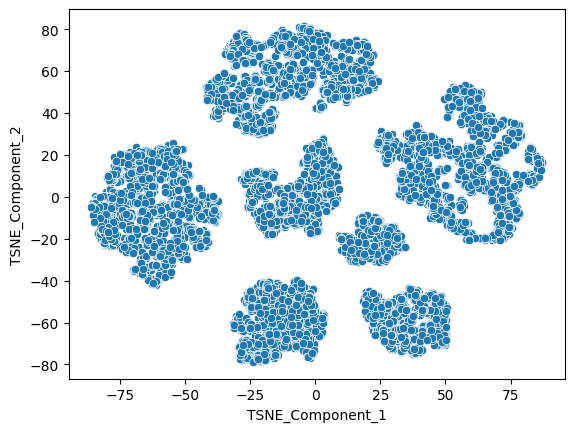

In [84]:
sns.scatterplot(x='TSNE_Component_1', y='TSNE_Component_2', data=df_tsne)

## It seems that the data is Highly separated into 7 clusters

# 6. <a name="5"> DBSCAN </a>
(<a href="#0">Go to top</a>)

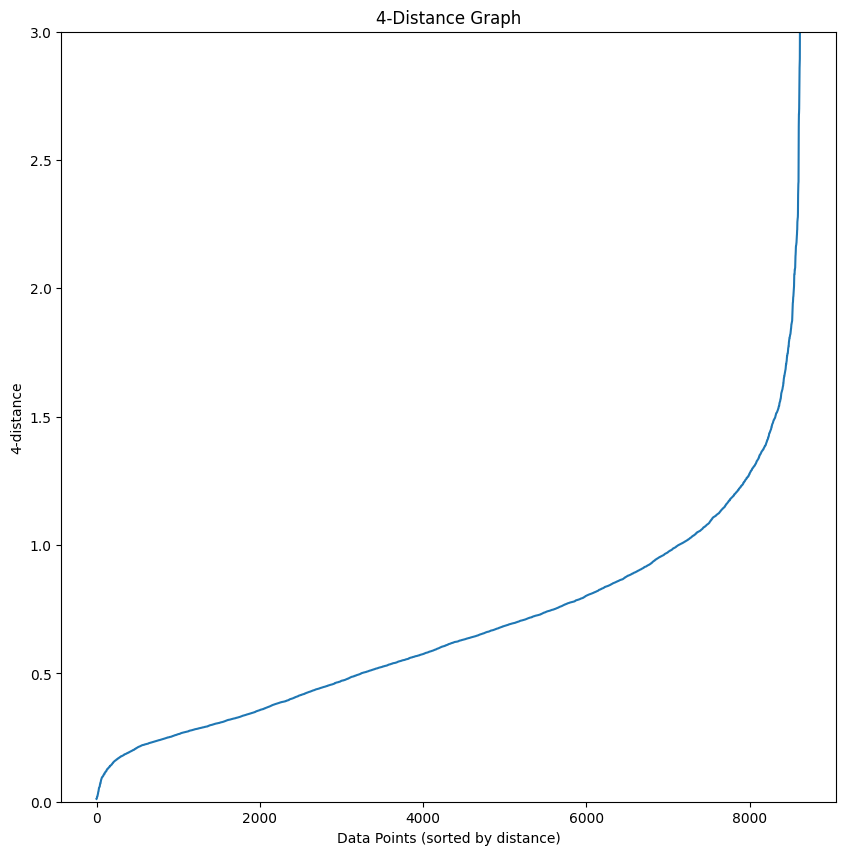

In [85]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

# Compute k-distance graph
k = 4  # Number of nearest neighbors
nbrs = NearestNeighbors(n_neighbors=k).fit(X_pca)
distances, _ = nbrs.kneighbors(X_pca)
k_distances = distances[:, -1]

# Sort distances in descending order
k_distances_sorted = np.sort(k_distances)[::-1]

# Plot k-distance graph
plt.figure(figsize=(10,10))
plt.plot(np.arange(len(k_distances_sorted[::-1])), k_distances_sorted[::-1])
plt.xlabel('Data Points (sorted by distance)')
plt.ylabel(f'{k}-distance')
plt.title(f'{k}-Distance Graph')
plt.ylim(0,3)
plt.show()

In [86]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=2, min_samples=2)

# Fit the model
dbscan.fit(X_pca)

# Get the cluster labels
labels = dbscan.labels_
print("Cluster Labels:", labels)


Cluster Labels: [0 1 2 ... 0 1 5]


In [87]:
df_tsne['DBSCAN_Cluster_Id'] = labels

<Axes: xlabel='TSNE_Component_1', ylabel='TSNE_Component_2'>

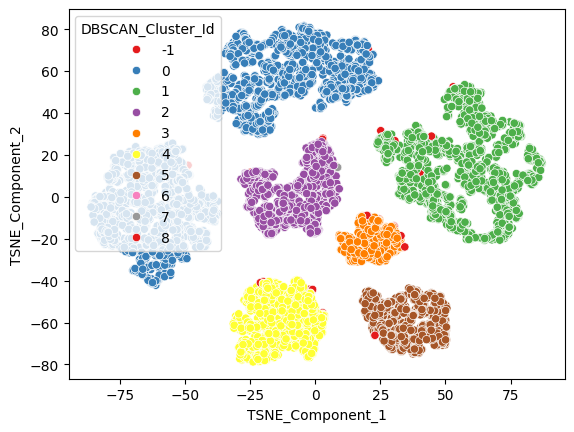

In [88]:
sns.scatterplot(x='TSNE_Component_1', y='TSNE_Component_2', data=df_tsne, hue=df_tsne['DBSCAN_Cluster_Id'],palette='Set1')

# 7. <a name="6">K Means</a>
(<a href="#0">Go to top</a>)

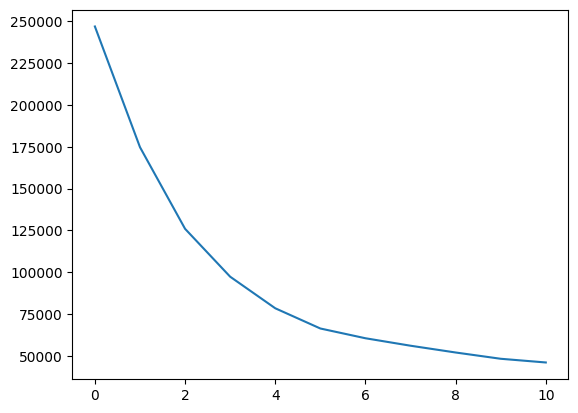

In [91]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X_pca)
    ssd.append(kmeans.inertia_)

# plot the SSDs for each n_clusters
plt.plot(ssd)

In [92]:
!pip install kneed
from kneed import KneeLocator
kl = KneeLocator(range_n_clusters, ssd, curve='convex', direction='decreasing')
elbow_num_clusters = kl.elbow
elbow_num_clusters

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip


5

In [93]:
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
def determine_k(X_pca):
    wcss = []
    distortions=[]
    sil=[]
    for i in range(1,15):
        km = KMeans(n_clusters=i)
        km.fit(X_pca)
        wcss.append(km.inertia_)
        distortions.append(sum(np.min(cdist(X_pca, km.cluster_centers_, 'euclidean'), axis=1)**2) / X_pca.shape[0])
        if i > 1:
            sil.append(silhouette_score(X_pca, km.labels_, metric = 'euclidean'))

    return wcss , distortions , sil

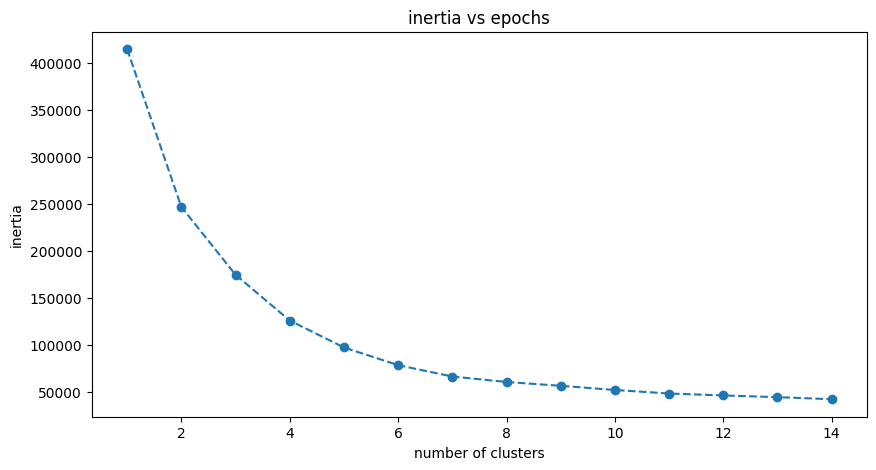

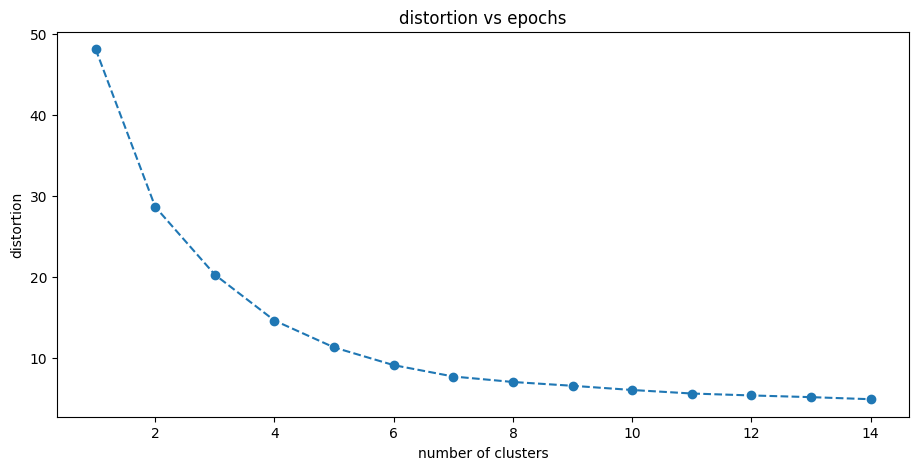

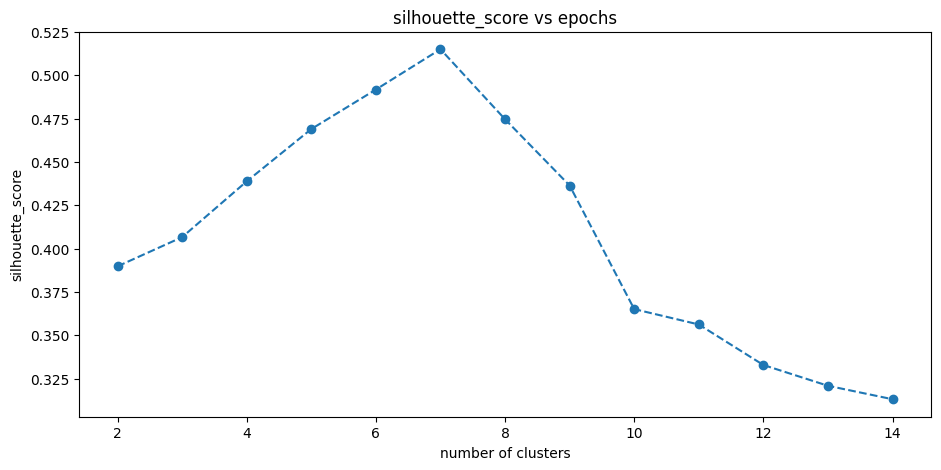

In [94]:
wcss , distortions , sil = determine_k(X_pca)

plt.figure(figsize=(10,5))
plt.plot(range(1,15),wcss, marker='o', linestyle='--')

plt.title('inertia vs epochs')
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.show()


plt.figure(figsize=(11,5))
plt.plot(range(1,15),distortions, marker='o', linestyle='--')

plt.title('distortion vs epochs')
plt.xlabel('number of clusters')
plt.ylabel('distortion')
plt.show()

plt.figure(figsize=(11,5))
plt.plot(range(2,15),sil, marker='o', linestyle='--')

plt.title('silhouette_score vs epochs')
plt.xlabel('number of clusters')
plt.ylabel('silhouette_score')
plt.show()

In [95]:
# Final model with k=7
kmeans = KMeans(n_clusters=7)
kmeans.fit(X_pca)

KMeans(n_clusters=7)

In [96]:
df_tsne['Cluster_Id'] = kmeans.labels_

<Axes: xlabel='TSNE_Component_1', ylabel='TSNE_Component_2'>

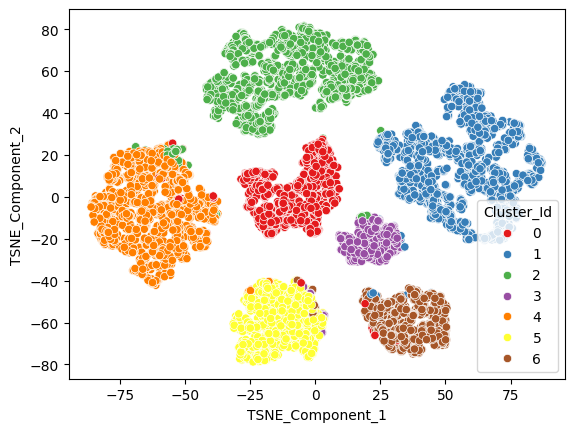

In [97]:
sns.scatterplot(x='TSNE_Component_1', y='TSNE_Component_2', data=df_tsne, hue=df_tsne['Cluster_Id'],palette='Set1')

In [98]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X_pca , kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.5149690040558798


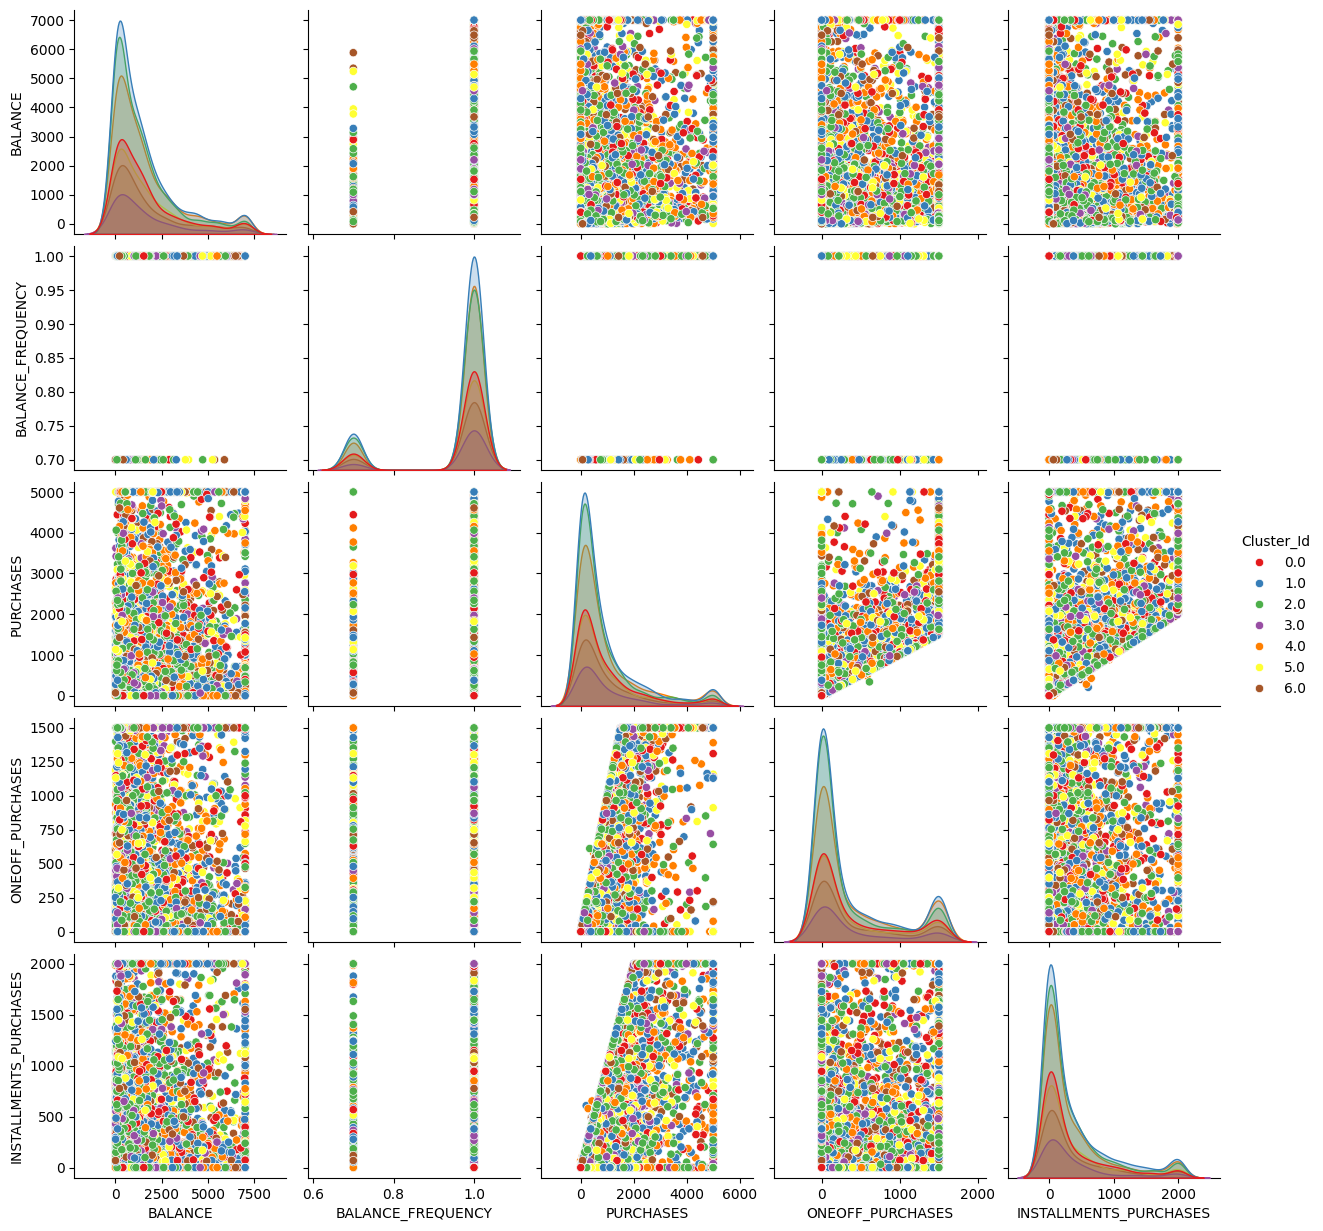

In [99]:
first_four_columns = df.iloc[:, :5]
first_four_columns['Cluster_Id'] = df_tsne['Cluster_Id']

# Creating a pairplot
sns.pairplot(first_four_columns, hue='Cluster_Id',palette='Set1')

### It is not easy to detect a pattern in 2D Scaterplot

In [100]:
df['Cluster_Id'] = kmeans.labels_

In [101]:
# ONEOFF_PURCHASES and ONEOFF_PURCHASES_FREQUENCY
# CASH_ADVANCE and CASH_ADVANCE_FREQUENCY and CASH_ADVANCE_TRX almost the same
# INSTALLMENTS_PURCHASES and PURCHASES_INSTALLMENTS_FREQUENCY

## 8. <a name="7">Features selection</a>
# (<a href="#0">Go to top</a>)

In [108]:
features=['BALANCE','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','CREDIT_LIMIT','PAYMENTS']
df_final=df[features]

# Apply Kmeans for all selected features

In [109]:
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log1p, validate=True)

df_log_transformed = pd.DataFrame(log_transformer.transform(df_final ), columns=df_final.columns)

df_log_specific = pd.DataFrame(log_transformer.transform(df_final),columns=df_final.columns)

# Alternatively, you can use the apply method of DataFrame:
df_log_all =df_final.apply(np.log1p)
df_log_all.head()

BALANCE  PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
0  3.735304   4.568506          0.000000                4.568506   
1  8.071989   0.000000          0.000000                0.000000   
2  7.822504   6.651791          6.651791                0.000000   
4  6.707735   2.833213          2.833213                0.000000   
5  7.501540   7.196147          0.000000                7.196147   

   CASH_ADVANCE  CREDIT_LIMIT  PAYMENTS  
0      0.000000      6.908755  5.312231  
1      7.601402      8.853808  8.294300  
2      0.000000      8.922792  6.434654  
4      0.000000      7.090910  6.521114  
5      0.000000      7.496097  7.244983

In [110]:
from sklearn.manifold import TSNE
import pandas as pd


X = df_log_all.values

tsne = TSNE(n_components=2, random_state=42)

# Apply T-SNE transformation to your data
X_tsne = tsne.fit_transform(X)

# Assuming X_tsne is a NumPy array with transformed data
# You can convert it to a DataFrame if needed
df_tsne = pd.DataFrame(X_tsne, columns=['TSNE_Component_1', 'TSNE_Component_2'])


<Axes: xlabel='TSNE_Component_1', ylabel='TSNE_Component_2'>

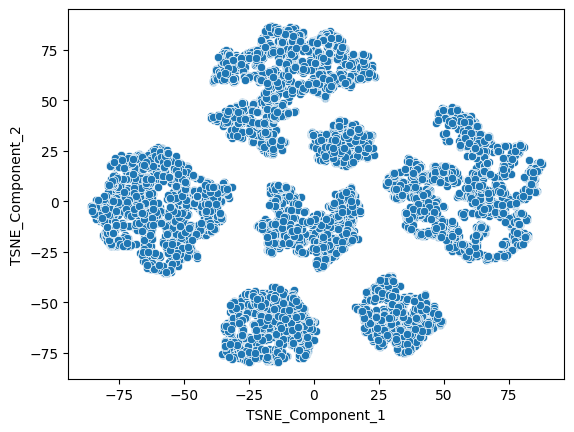

In [111]:
sns.scatterplot(x='TSNE_Component_1', y='TSNE_Component_2', data=df_tsne)

In [112]:
# Final model with k=7
kmeans = KMeans(n_clusters=7)
kmeans.fit(df_log_all)

KMeans(n_clusters=7)

In [113]:
df_tsne['Cluster_Id'] = kmeans.labels_

<Axes: xlabel='TSNE_Component_1', ylabel='TSNE_Component_2'>

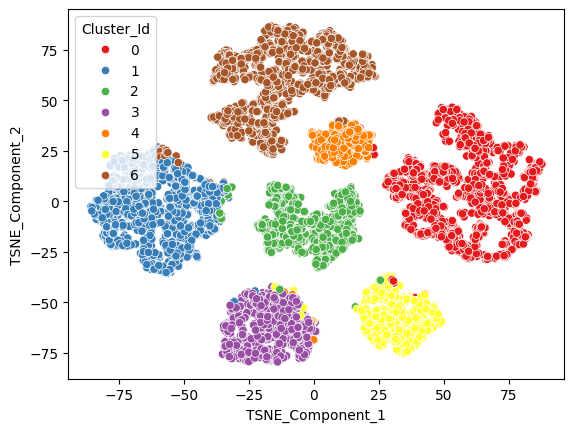

In [114]:
sns.scatterplot(x='TSNE_Component_1', y='TSNE_Component_2', data=df_tsne, hue=df_tsne['Cluster_Id'],palette='Set1')


In [115]:
df_final['Cluster_Id']= kmeans.labels_

In [117]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(df_log_all , kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.5339008704576838


# 9. <a name="8">Hierarchical Clustering</a>
(<a href="#0">Go to top</a>)


##  <a name="5">Training and hyperparamter tuning</a>
(<a href="#0">Go to top</a>)


Before we start the training process we need to specify 3 paramters:<br>
1- Linkage criteria : The linkage criterion determines the distance between two clusters
    - Complete-Linkage Clustering
    - Single-Linkage Clustering
    - Average-Linkage Clustering
    - Centroid Linkage Clustering
2- Distance function:
    - Euclidean Distance
    - Manhattan Distance
    - Mahalanobis distance
3- Number of clusters


### *Number of clusters*
Use Dendograms to specify the optimum number of clusters
- Compare how changing linkage criteria or distance function would affect the optimum number of clusters
- you can use silhouette_score or any other evalution method to help you determine the optimum number of clusters
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

In [195]:
df_final_2=df_final.drop('Cluster_Id',axis=1)

In [119]:
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log1p, validate=True)

df_log_transformed = pd.DataFrame(log_transformer.transform(df_final_2 ), columns=df_final_2.columns)

df_log_specific = pd.DataFrame(log_transformer.transform(df_final_2),columns=df_final_2.columns)

# Alternatively, you can use the apply method of DataFrame:
df_log_all =df_final_2.apply(np.log1p)
df_log_all.head()

BALANCE  PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
0  3.735304   4.568506          0.000000                4.568506   
1  8.071989   0.000000          0.000000                0.000000   
2  7.822504   6.651791          6.651791                0.000000   
4  6.707735   2.833213          2.833213                0.000000   
5  7.501540   7.196147          0.000000                7.196147   

   CASH_ADVANCE  CREDIT_LIMIT  PAYMENTS  
0      0.000000      6.908755  5.312231  
1      7.601402      8.853808  8.294300  
2      0.000000      8.922792  6.434654  
4      0.000000      7.090910  6.521114  
5      0.000000      7.496097  7.244983

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering




linkage_methods = ['single', 'complete', 'average']
distance_metrics = ['euclidean','mahalanobis']
clasters=[2,3,4,5,6,7]
silhouette_scores = []

for linkage_method in linkage_methods:
    for distance_metric in distance_metrics:
        Z = shc.linkage(df_log_all, method=linkage_method, metric=distance_metric)

        # Calculate clusters
        #model=AgglomerativeClustering(n_clusters=k)
        #y_labels=model.fit_predict(df_log_all)
        clusters = shc.fcluster(Z, t=5, criterion='maxclust')  # Example: specify a threshold or max number of clusters

        # Calculate silhouette score
        silhouette_avg = silhouette_score(df_log_all, clusters)
        # Store silhouette score and parameters used
        silhouette_scores.append({
            'Linkage Method': linkage_method,
            'Distance Metric': distance_metric,
            'Silhouette Score': silhouette_avg,
        })

# Convert silhouette scores to DataFrame for easier analysis
silhouette_scores_df = pd.DataFrame(silhouette_scores)

# Print or visualize silhouette scores DataFrame
print(silhouette_scores_df)



  Linkage Method Distance Metric  Silhouette Score
0         single       euclidean          0.059728
1         single     mahalanobis          0.028976
2       complete       euclidean          0.395649
3       complete     mahalanobis         -0.096149
4        average       euclidean          0.426448
5        average     mahalanobis         -0.116931


In [121]:
silhouette_scores_df

Linkage Method Distance Metric  Silhouette Score
0         single       euclidean          0.059728
1         single     mahalanobis          0.028976
2       complete       euclidean          0.395649
3       complete     mahalanobis         -0.096149
4        average       euclidean          0.426448
5        average     mahalanobis         -0.116931

In [122]:
silhouette_scores_df.loc[silhouette_scores_df['Silhouette Score'].idxmax()]

Linkage Method        average
Distance Metric     euclidean
Silhouette Score     0.426448
Name: 4, dtype: object

In [123]:
# Plot dendrogram for the selected combination with the highest silhouette score
silhouette_score = silhouette_scores_df.loc[silhouette_scores_df['Silhouette Score'].idxmax(), 'Silhouette Score']

selected_linkage = silhouette_scores_df.loc[silhouette_scores_df['Silhouette Score'].idxmax(), 'Linkage Method']
selected_metric = silhouette_scores_df.loc[silhouette_scores_df['Silhouette Score'].idxmax(), 'Distance Metric']
print('silhouette_score',silhouette_score)
print('selected_linkage',selected_linkage)
print('selected_metric',selected_metric)


silhouette_score 0.4264478334607458
selected_linkage average
selected_metric euclidean


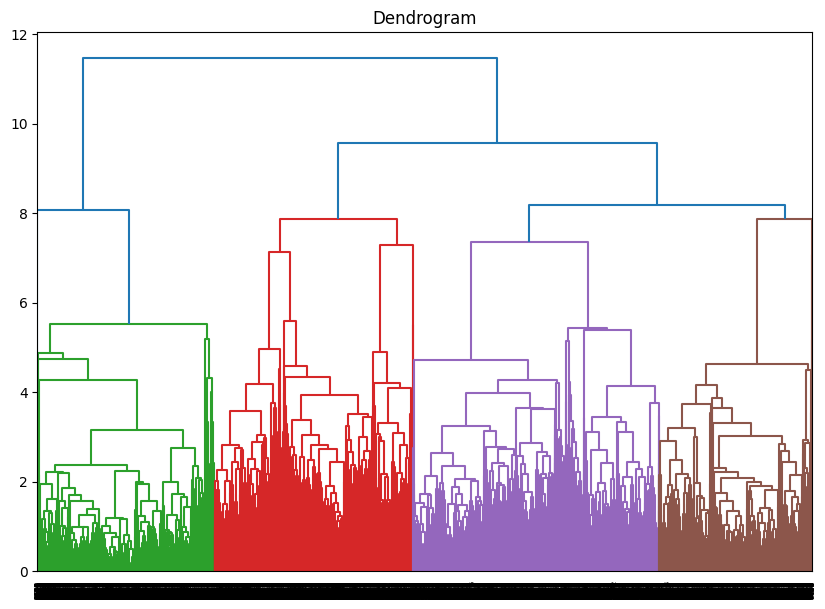

In [124]:
Z = shc.linkage(df_log_all, method=selected_linkage, metric=selected_metric)
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dend = shc.dendrogram(Z)
plt.show()


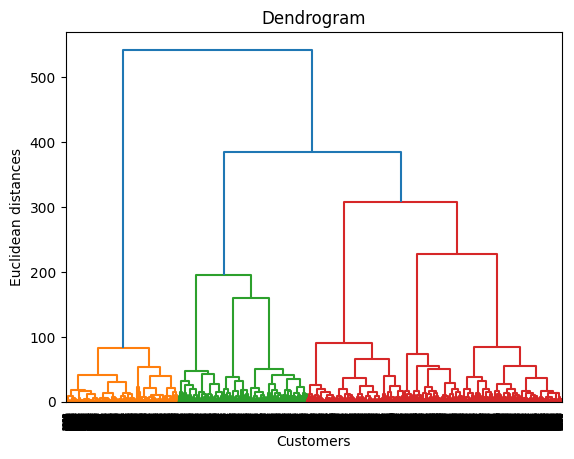

In [125]:
dendrogram = shc.dendrogram(shc.linkage(df_log_all, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

## It looks like we have 4 clusters but actually we have used 7 clusters with low difference

In [126]:
#training
from sklearn.cluster import AgglomerativeClustering
model=AgglomerativeClustering(n_clusters=7)
y_labels=model.fit_predict(df_log_all)
df_final['Cluster_Id_AGG']=y_labels

<Axes: xlabel='TSNE_Component_1', ylabel='TSNE_Component_2'>

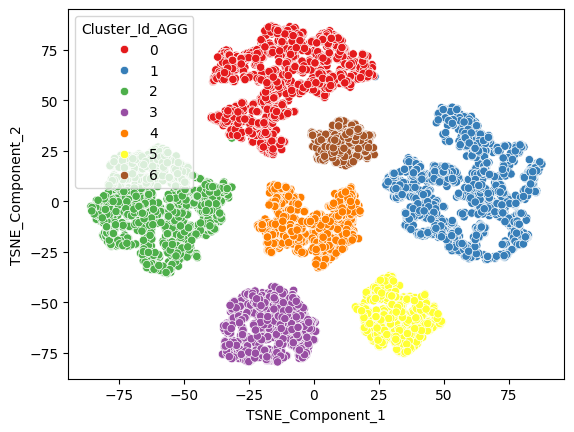

In [127]:
df_tsne['Cluster_Id_AGG'] = y_labels
sns.scatterplot(x='TSNE_Component_1', y='TSNE_Component_2', data=df_tsne, hue=df_tsne['Cluster_Id_AGG'],palette='Set1')

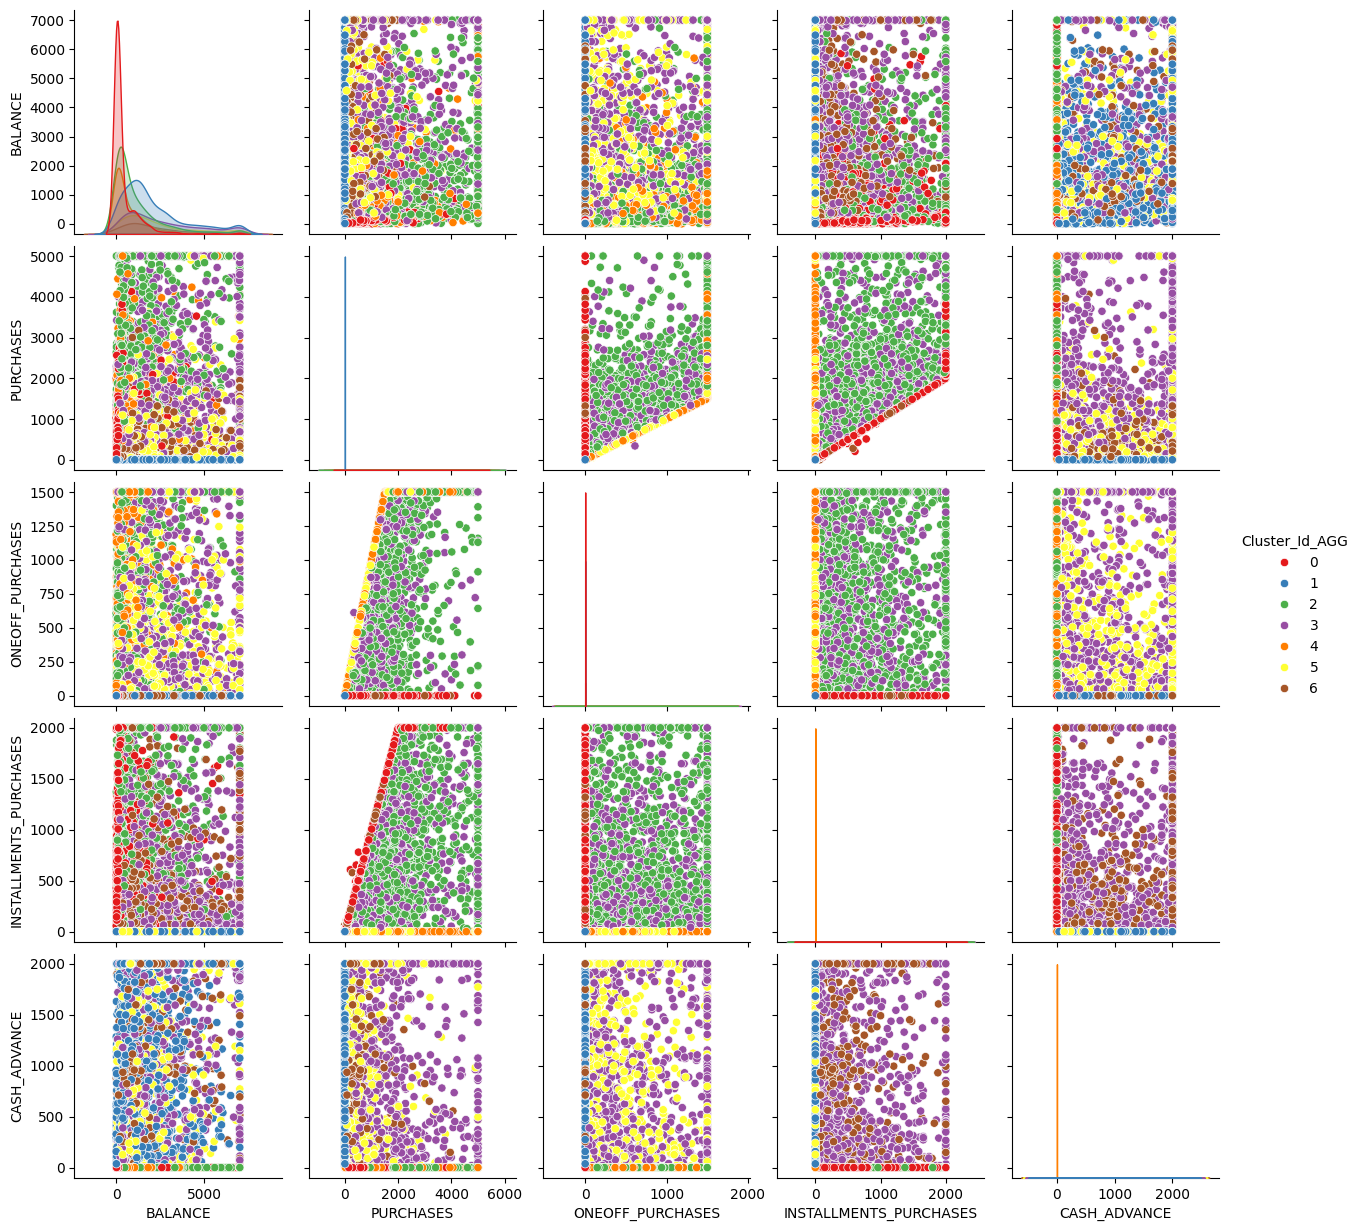

In [128]:
first_four_columns = df_final_2.iloc[:, :5]
first_four_columns['Cluster_Id_AGG'] = y_labels

# Creating a pairplot
sns.pairplot(first_four_columns, hue='Cluster_Id_AGG',palette='Set1')

In [129]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(df_log_all , y_labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.5301084640337465


## we can notice that we have kinde of pattern between Clusters

In [196]:
df_final_2['Cluster_Id']=y_labels

## Conclusion
### Hierarchical Clustering better than Kmeans

# 10. <a name="9">GaussianMixture</a>
(<a href="#0">Go to top</a>)



In [131]:
df_final_3=df_final.drop(['Cluster_Id','Cluster_Id_AGG'],axis=1)

In [141]:
from sklearn.mixture import GaussianMixture
n_components = 7
em_model = GaussianMixture(n_components=n_components)

em_model.fit(df_log_all)

cluster_assignments = em_model.predict(df_log_all)

df_final_3['Cluster_Id'] = cluster_assignments

In [142]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(df_log_all , cluster_assignments)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.41395274213375777


<Axes: xlabel='TSNE_Component_1', ylabel='TSNE_Component_2'>

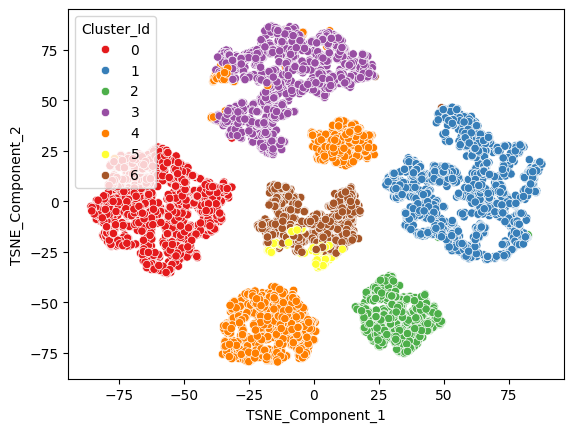

In [137]:
df_tsne['Cluster_Id']=cluster_assignments
sns.scatterplot(x='TSNE_Component_1', y='TSNE_Component_2', data=df_tsne, hue=df_tsne['Cluster_Id'],palette='Set1')

## Conclusion
### Hierarchical Clustering better than Kmeans GaussianMixture

## We got better results with selected features without PCA so we made successfully select the most representative features features

In [143]:
df_final_2.head()

BALANCE  PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
0    40.900749      95.40              0.00                   95.40   
1  3202.467416       0.00              0.00                    0.00   
2  2495.148862     773.17            773.17                    0.00   
4   817.714335      16.00             16.00                    0.00   
5  1809.828751    1333.28              0.00                 1333.28   

   CASH_ADVANCE  CREDIT_LIMIT     PAYMENTS  Cluster_Id  
0           0.0        1000.0   201.802084           0  
1        2000.0        7000.0  4000.000000           1  
2           0.0        7500.0   622.066742           4  
4           0.0        1200.0   678.334763           4  
5           0.0        1800.0  1400.057770           0

In [144]:
clustersPersntage=dict()
for i in  zip(df_final_2['Cluster_Id'].value_counts().sort_values().values,df_final_2['Cluster_Id'].value_counts().sort_values().index):
    print(i)
    clustersPersntage[i[1]]=i[0]/df_final_2.shape[0]

clustersPersntage

(460, 6)
(770, 5)
(1004, 3)
(1006, 4)
(1696, 0)
(1726, 2)
(1969, 1)


{6: 0.05329625767581972,
 5: 0.08921330089213302,
 3: 0.11632487544896304,
 4: 0.11655659830842313,
 0: 0.1965009848221527,
 2: 0.19997682771405398,
 1: 0.22813115513845442}

<Axes: xlabel='Cluster_Id', ylabel='count'>

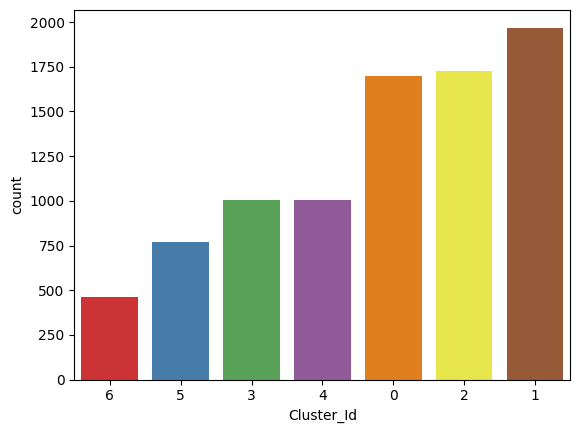

In [149]:
sns.countplot(df_final_2,x='Cluster_Id',palette='Set1',order=df_final_2['Cluster_Id'].value_counts().sort_values().index)


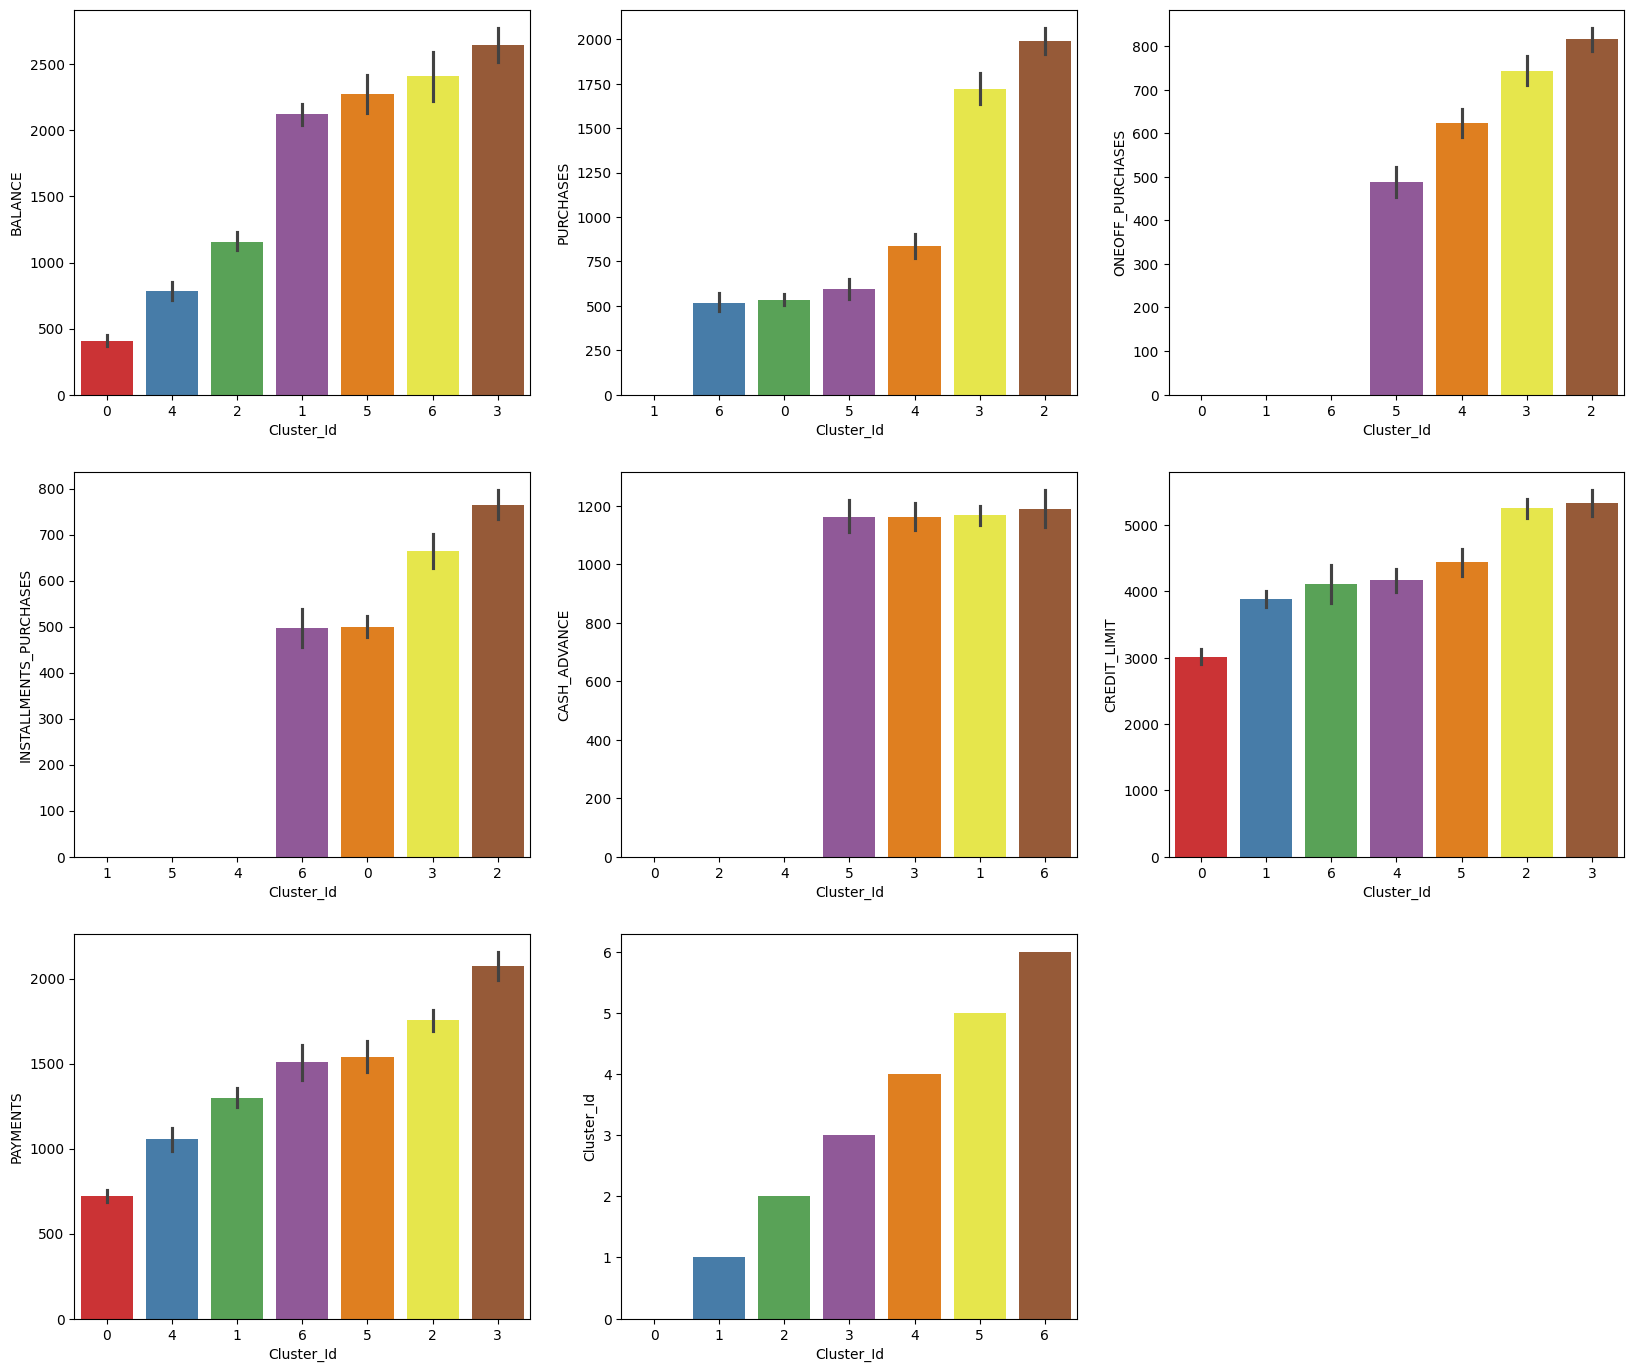

In [150]:
plt.figure(figsize=(20,35))
for i, col in enumerate(df_final_2.columns):
        ax = plt.subplot(6, 3, i+1)

        df_sorted = df_final_2.groupby('Cluster_Id')[col].mean().sort_values().index
        sns.barplot(data=df_final_2, x='Cluster_Id', y=col, palette='Set1', order=df_sorted)
        plt.xlabel('Cluster_Id')
plt.show()

### Cluster 0: Low Balance & Credit Limit, No Purchases, No One-off Purchases, No Installments Purchases, No Cash in Advance, Lowest Payments
### Cluster 1: No Purchases, No One-off Purchases, No Installments Purchases, Zero Purchases Frequency
### Cluster 2: High Balance, High Purchases, Highest Purchases Frequency, Highest Credit Limit, Highest Payments
### Cluster 3: Highest Balance, High Purchases, Almost Highest Credit Limit, Highest Payments
### Cluster 4: No One-off Purchases, No Installments Purchases, No Cash in Advance
### Cluster 5: No Installments Purchases
### Cluster 6: No One-off Purchases, No Cash in Advance

# 11. <a name="10">Clusters overview</a>
(<a href="#0">Go to top</a>)


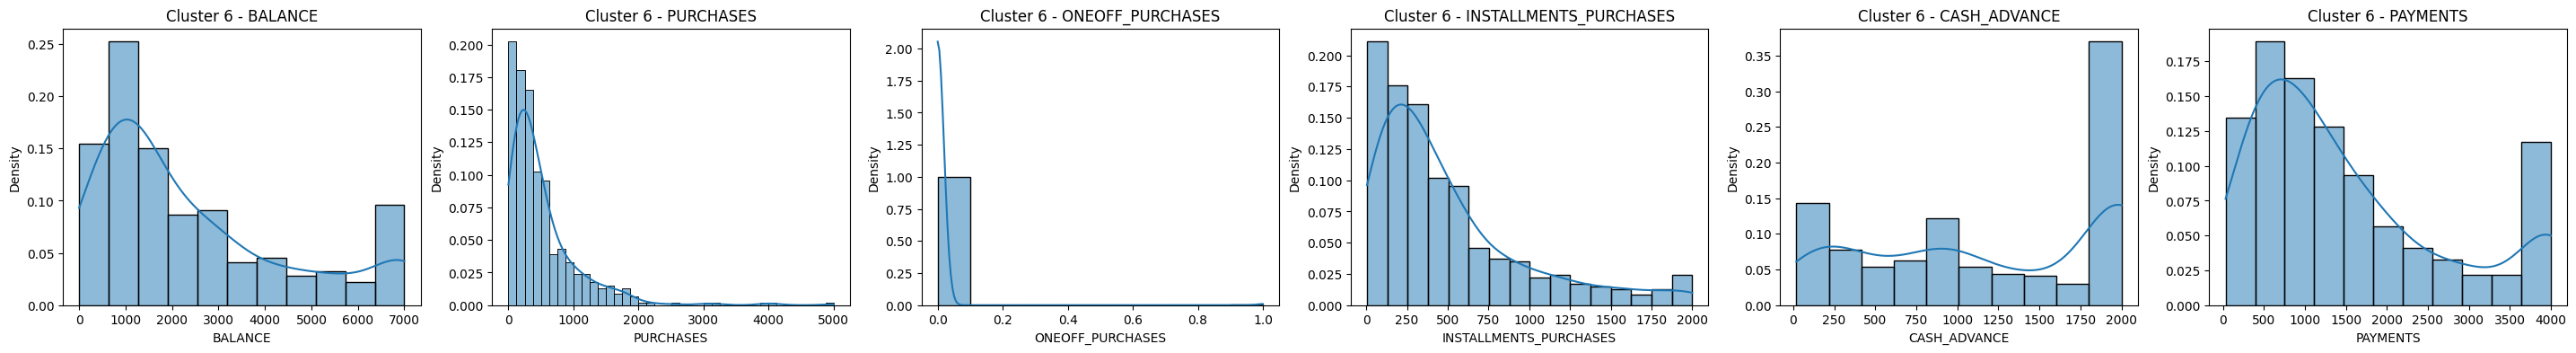

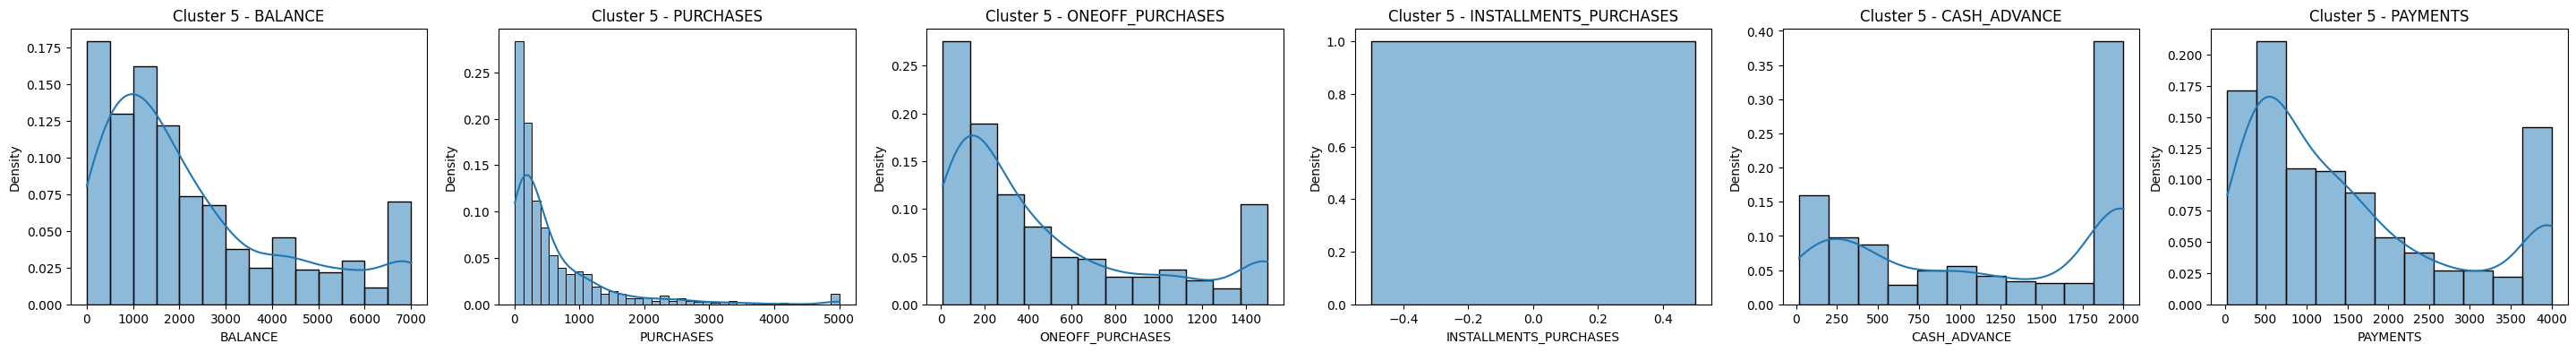

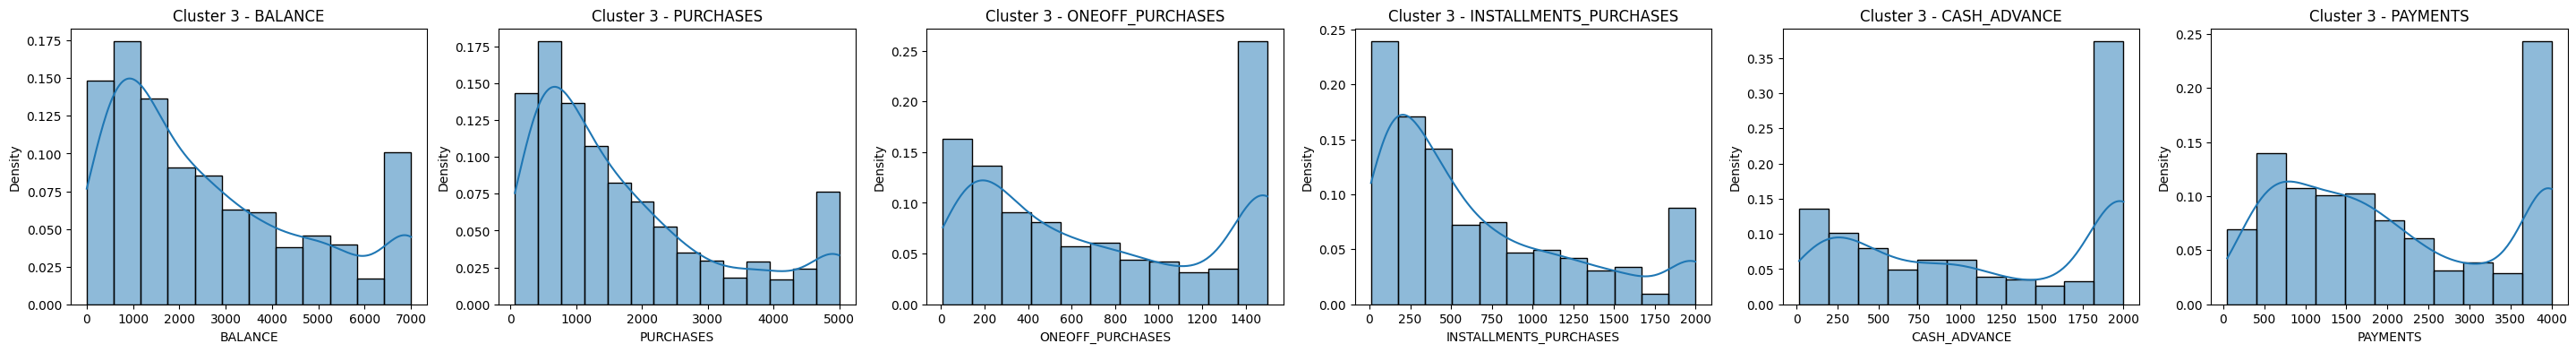

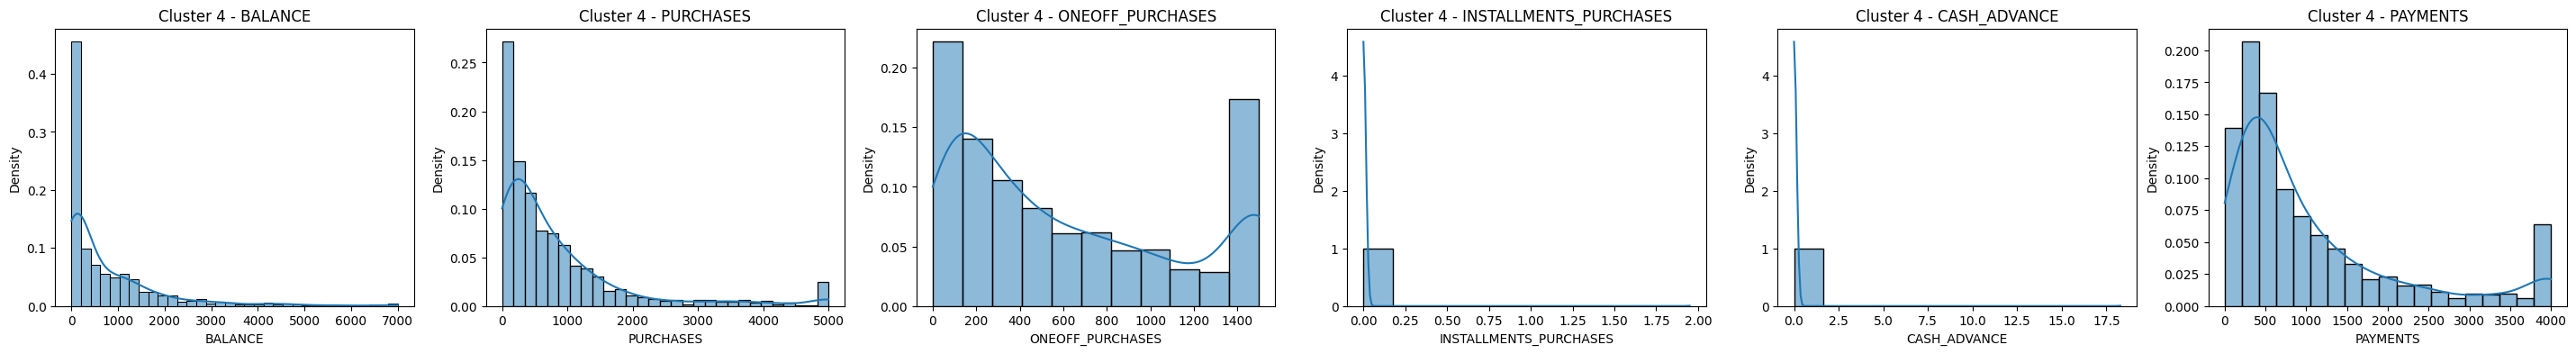

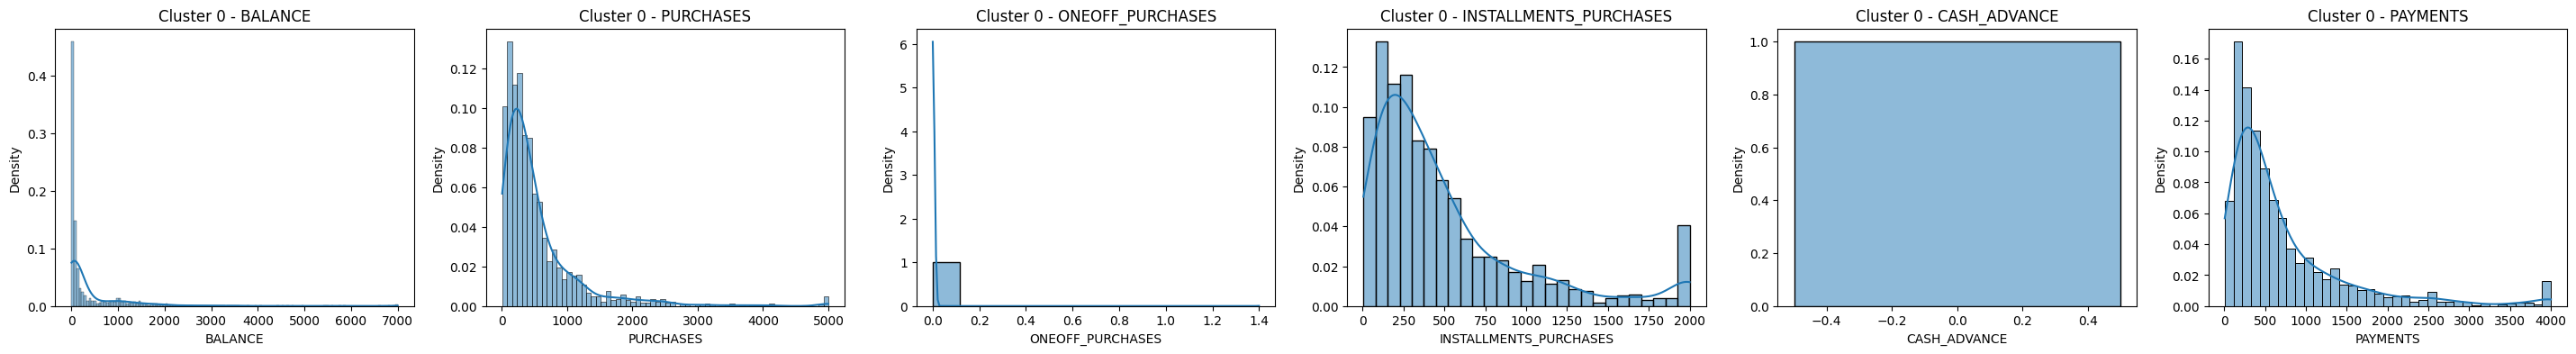

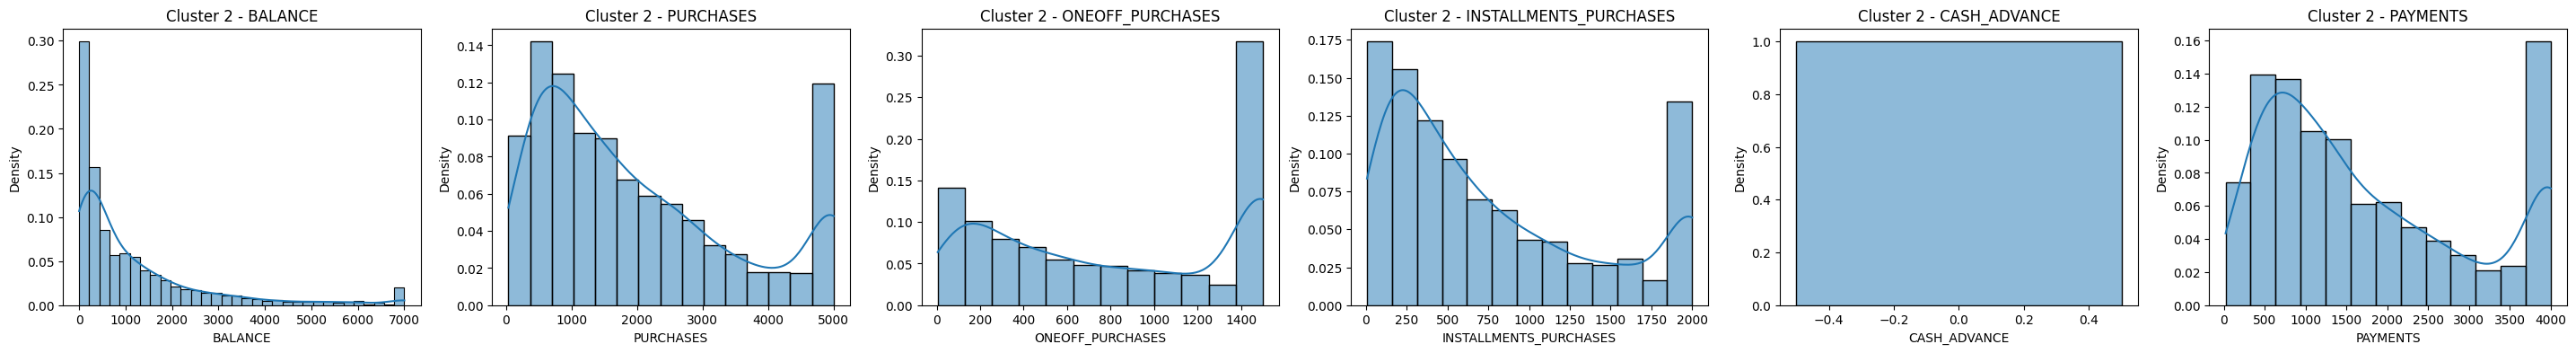

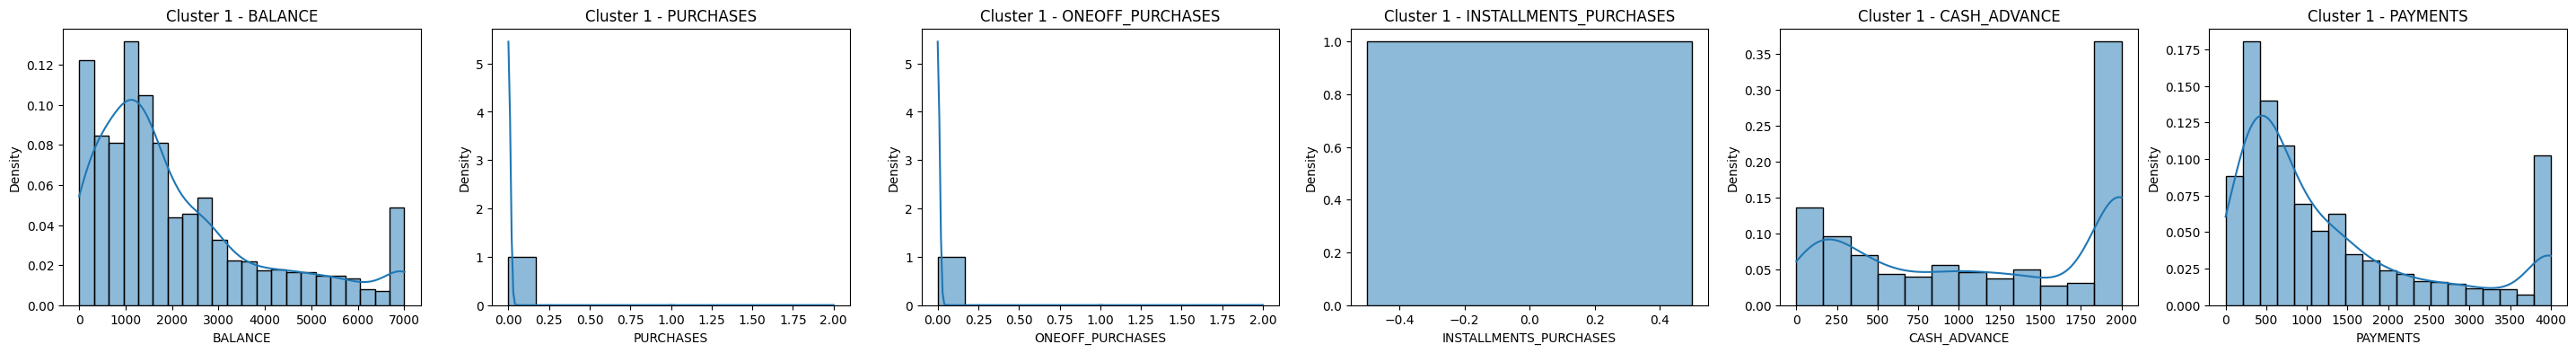

In [151]:
feature_columns = ['BALANCE','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','PAYMENTS']

for cluster_label in clustersPersntage.keys():
    # Filter data points belonging to the current cluster
    cluster_data = df_final_2[df_final_2['Cluster_Id'] == cluster_label]

    # Create subplots for each feature
    fig, axes = plt.subplots(1, len(feature_columns), figsize=(len(feature_columns) * 6, 4))

    # Plot normalized distribution for each feature
    for i, feature in enumerate(feature_columns):
        sns.histplot(cluster_data[feature], kde=True, ax=axes[i] , stat='proportion')
        axes[i].set_title(f'Cluster {cluster_label} - {feature}')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Density')

In [152]:
df_final_2.describe()

BALANCE    PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
count  8631.000000  8631.000000       8631.000000             8631.000000   
mean   1527.362473   881.122029        366.047167              354.723352   
std    1816.780896  1236.016202        528.094261              535.520643   
min       0.000000     0.000000          0.000000                0.000000   
25%     147.802162    43.945000          0.000000                0.000000   
50%     916.627912   375.570000         45.000000               94.860000   
75%    2097.537102  1145.100000        598.725000              483.680000   
max    7000.000000  5000.000000       1500.000000             2000.000000   

       CASH_ADVANCE  CREDIT_LIMIT     PAYMENTS   Cluster_Id  
count   8631.000000   8631.000000  8631.000000  8631.000000  
mean     569.160044   4248.560785  1370.851763     2.209130  
std      786.923364   2959.526958  1231.636337     1.791363  
min        0.000000     50.000000     0.049513     0.000000  
25%        0.000000   1600.000000   418.169528     1.000000  
50%        0.000000   3000.000000   894.936707     2.000000  
75%     1131.708049   6500.000000  1944.526874     4.000000  
max     2000.000000  10000.000000  4000.000000     6.000000

# Cluster 0: "Frugal Essentials"
## - Targets customers with low balances and minimal spending habits, focusing on essential purchases only.


In [160]:
print('cluser 0 Persntage= ',clustersPersntage[0])

cluser 0 Persntage=  0.1965009848221527


In [197]:
df_final_2

BALANCE  PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
0       40.900749      95.40              0.00                   95.40   
1     3202.467416       0.00              0.00                    0.00   
2     2495.148862     773.17            773.17                    0.00   
4      817.714335      16.00             16.00                    0.00   
5     1809.828751    1333.28              0.00                 1333.28   
...           ...        ...               ...                     ...   
8943     5.871712      20.90             20.90                    0.00   
8945    28.493517     291.12              0.00                  291.12   
8947    23.398673     144.40              0.00                  144.40   
8948    13.457564       0.00              0.00                    0.00   
8949   372.708075    1093.25           1093.25                    0.00   

      CASH_ADVANCE  CREDIT_LIMIT     PAYMENTS  Cluster_Id_AGG  Cluster_Id  
0         0.000000        1000.0   201.802084               0           0  
1      2000.000000        7000.0  4000.000000               1           1  
2         0.000000        7500.0   622.066742               4           4  
4         0.000000        1200.0   678.334763               4           4  
5         0.000000        1800.0  1400.057770               0           0  
...            ...           ...          ...             ...         ...  
8943      0.000000         500.0    58.644883               4           4  
8945      0.000000        1000.0   325.594462               0           0  
8947      0.000000        1000.0    81.270775               0           0  
8948     36.558778         500.0    52.549959               1           1  
8949    127.040008        1200.0    63.165404               5           5  

[8631 rows x 9 columns]

In [ ]:
df_final_2.drop()

In [153]:
cl0_df=df_final_2[df_final_2['Cluster_Id']==0]
cl0_df.describe()

BALANCE    PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
count  1696.000000  1696.000000       1696.000000             1696.000000   
mean    408.876235   534.579475          0.000849              499.396875   
std     852.006983   640.352117          0.034000              483.125247   
min       0.000000     4.800000          0.000000                4.800000   
25%      21.818030   167.602500          0.000000              167.602500   
50%      62.615831   339.720000          0.000000              339.875000   
75%     339.863014   623.272500          0.000000              624.450000   
max    7000.000000  5000.000000          1.400000             2000.000000   

       CASH_ADVANCE  CREDIT_LIMIT     PAYMENTS  Cluster_Id  
count        1696.0   1696.000000  1696.000000      1696.0  
mean            0.0   3014.866382   719.976900         0.0  
std             0.0   2323.834679   777.321148         0.0  
min             0.0    300.000000     4.841543         0.0  
25%             0.0   1237.500000   229.471584         0.0  
50%             0.0   2500.000000   443.805390         0.0  
75%             0.0   4000.000000   885.673299         0.0  
max             0.0  10000.000000  4000.000000         0.0

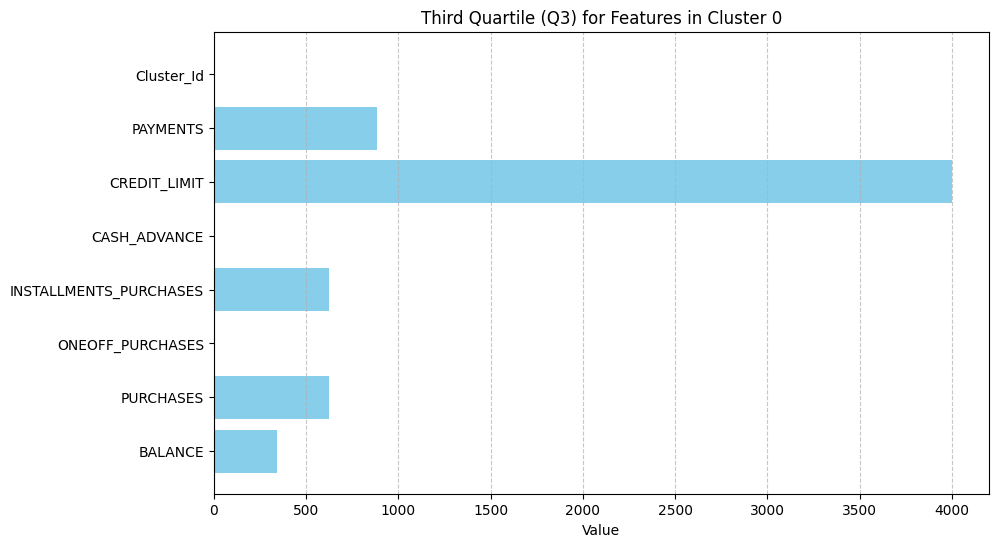

In [154]:
third_iqr = cl0_df.quantile(0.75)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(third_iqr.index, third_iqr.values, color='skyblue')
plt.xlabel('Value')
plt.title('Third Quartile (Q3) for Features in Cluster 0')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [155]:
third_iqr = cl0_df.quantile(0.75)

# Print business insights for each feature
for feature, value in third_iqr.items():
    #print(f"Third Quartile (Q3) for {feature}: {value}")
    print(f"75% of customers in Cluster 0 hase {feature} less than or equal to {value} on average.")



75% of customers in Cluster 0 hase BALANCE less than or equal to 339.86301449999996 on average.
75% of customers in Cluster 0 hase PURCHASES less than or equal to 623.2725 on average.
75% of customers in Cluster 0 hase ONEOFF_PURCHASES less than or equal to 0.0 on average.
75% of customers in Cluster 0 hase INSTALLMENTS_PURCHASES less than or equal to 624.45 on average.
75% of customers in Cluster 0 hase CASH_ADVANCE less than or equal to 0.0 on average.
75% of customers in Cluster 0 hase CREDIT_LIMIT less than or equal to 4000.0 on average.
75% of customers in Cluster 0 hase PAYMENTS less than or equal to 885.67329925 on average.
75% of customers in Cluster 0 hase Cluster_Id less than or equal to 0.0 on average.


### Cluater 0 have lowe BALANCE , INSTALLMENTS_PURCHASES = 0 , CASH_ADVANCE = 0 , CASH_ADVANCE_FREQUENCY = 0

# Cluster 1: "Budget Savvy"
## - Caters to customers who prefer strict budgeting, offering financial management tools and advice.


In [156]:
print('cluser 1 Persntage= ',clustersPersntage[1])

cluser 1 Persntage=  0.22813115513845442


In [157]:
cl1_df=df_final_2[df_final_2['Cluster_Id']==1]
cl1_df.describe()

BALANCE    PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
count  1969.000000  1969.000000       1969.000000                  1969.0   
mean   2125.509008     0.002189          0.002189                     0.0   
std    1874.066372     0.055449          0.055449                     0.0   
min       0.001146     0.000000          0.000000                     0.0   
25%     825.977042     0.000000          0.000000                     0.0   
50%    1502.000147     0.000000          0.000000                     0.0   
75%    2866.054641     0.000000          0.000000                     0.0   
max    7000.000000     2.000000          2.000000                     0.0   

       CASH_ADVANCE  CREDIT_LIMIT     PAYMENTS  Cluster_Id  
count   1969.000000   1969.000000  1969.000000      1969.0  
mean    1168.745616   3878.169968  1298.635692         1.0  
std      758.398893   2834.523179  1208.231417         0.0  
min        0.000000     50.000000     0.049513         1.0  
25%      379.770302   1500.000000   395.136073         1.0  
50%     1218.392345   3000.000000   803.519921         1.0  
75%     2000.000000   6000.000000  1769.702541         1.0  
max     2000.000000  10000.000000  4000.000000         1.0

### It seams cluater 1 have PURCHASES , all  PURCHASES fetures  and INSTALLMENTS_PURCHASES = 0

In [158]:
third_iqr = cl1_df.quantile(0.75)

# Print business insights for each feature
for feature, value in third_iqr.items():
    #print(f"Third Quartile (Q3) for {feature}: {value}")
    print(f"75% of customers in Cluster 0 hase {feature} less than or equal to {value} on average.")



75% of customers in Cluster 0 hase BALANCE less than or equal to 2866.054641 on average.
75% of customers in Cluster 0 hase PURCHASES less than or equal to 0.0 on average.
75% of customers in Cluster 0 hase ONEOFF_PURCHASES less than or equal to 0.0 on average.
75% of customers in Cluster 0 hase INSTALLMENTS_PURCHASES less than or equal to 0.0 on average.
75% of customers in Cluster 0 hase CASH_ADVANCE less than or equal to 2000.0 on average.
75% of customers in Cluster 0 hase CREDIT_LIMIT less than or equal to 6000.0 on average.
75% of customers in Cluster 0 hase PAYMENTS less than or equal to 1769.702541 on average.
75% of customers in Cluster 0 hase Cluster_Id less than or equal to 1.0 on average.


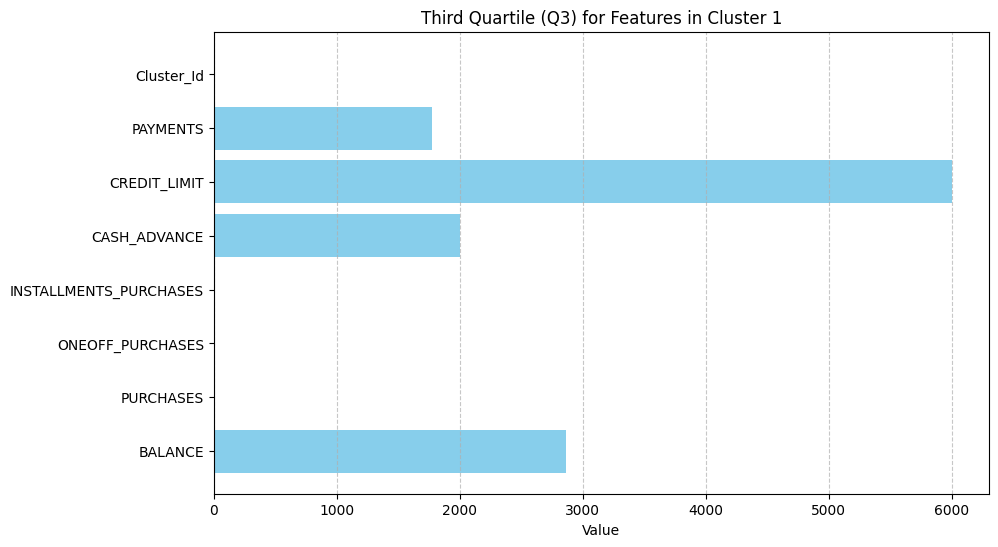

In [161]:
third_iqr = cl1_df.quantile(0.75)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(third_iqr.index, third_iqr.values, color='skyblue')
plt.xlabel('Value')
plt.title('Third Quartile (Q3) for Features in Cluster 1')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


# Cluster 2: "Premium Powerhouse"
## - Appeals to high-spending customers with excellent credit and frequent purchases, providing exclusive offers and rewards.


In [162]:
print('cluser 2 Persntage= ',clustersPersntage[2])

cluser 2 Persntage=  0.19997682771405398


In [163]:
cl2_df=df_final_2[df_final_2['Cluster_Id']==2]
cl2_df.describe()

BALANCE    PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
count  1726.000000  1726.000000       1726.000000             1726.000000   
mean   1158.743493  1987.657787        816.548859              764.676008   
std    1503.246858  1520.300308        559.232865              646.981445   
min       0.704307    34.000000          5.000000                6.330000   
25%     169.069225   741.547500        269.507500              229.232500   
50%     535.698218  1535.900000        770.495000              545.105000   
75%    1517.986843  2854.807500       1500.000000             1173.922500   
max    7000.000000  5000.000000       1500.000000             2000.000000   

       CASH_ADVANCE  CREDIT_LIMIT     PAYMENTS  Cluster_Id  
count        1726.0   1726.000000  1726.000000      1726.0  
mean            0.0   5252.782050  1754.386912         2.0  
std             0.0   2997.369106  1264.457480         0.0  
min             0.0    300.000000    18.125527         2.0  
25%             0.0   2500.000000   707.296030         2.0  
50%             0.0   5000.000000  1349.378720         2.0  
75%             0.0   7500.000000  2604.398133         2.0  
max             0.0  10000.000000  4000.000000         2.0

In [164]:
third_iqr = cl2_df.quantile(0.75)

# Print business insights for each feature
for feature, value in third_iqr.items():
    #print(f"Third Quartile (Q3) for {feature}: {value}")
    print(f"75% of customers in Cluster 0 hase {feature} less than or equal to {value} on average.")



75% of customers in Cluster 0 hase BALANCE less than or equal to 1517.9868430000001 on average.
75% of customers in Cluster 0 hase PURCHASES less than or equal to 2854.8075 on average.
75% of customers in Cluster 0 hase ONEOFF_PURCHASES less than or equal to 1500.0 on average.
75% of customers in Cluster 0 hase INSTALLMENTS_PURCHASES less than or equal to 1173.9225000000001 on average.
75% of customers in Cluster 0 hase CASH_ADVANCE less than or equal to 0.0 on average.
75% of customers in Cluster 0 hase CREDIT_LIMIT less than or equal to 7500.0 on average.
75% of customers in Cluster 0 hase PAYMENTS less than or equal to 2604.3981335 on average.
75% of customers in Cluster 0 hase Cluster_Id less than or equal to 2.0 on average.


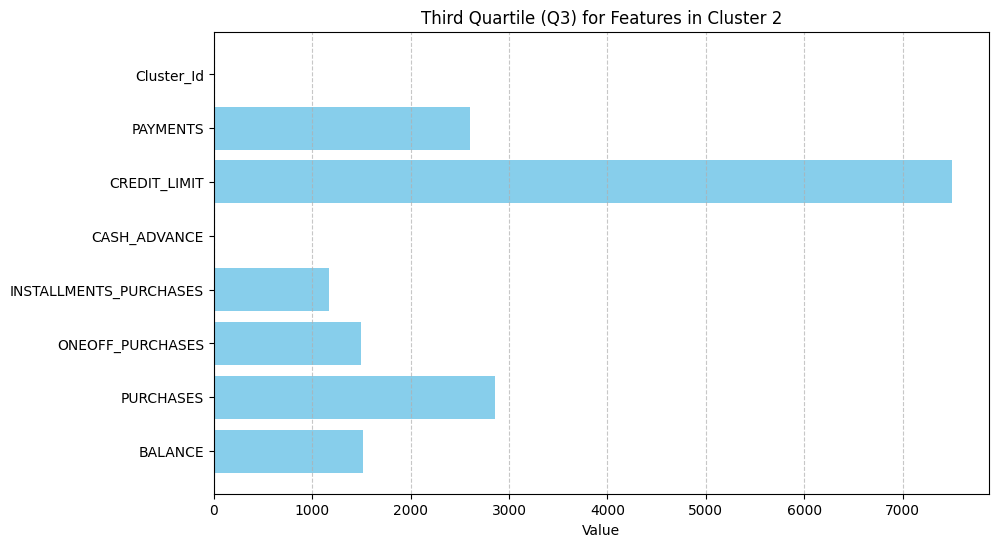

In [165]:
third_iqr = cl2_df.quantile(0.75)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(third_iqr.index, third_iqr.values, color='skyblue')
plt.xlabel('Value')
plt.title('Third Quartile (Q3) for Features in Cluster 2')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


## 0.23% from the coustomers have no PURCHASES
###  It seams cluater 2 have PURCHASES , all  PURCHASES fetures  and high INSTALLMENTS_PURCHASES

# Cluster 3: "Elite Spenders Club"
## - Exclusively for top-tier customers with the highest balances, offering luxury services and tailored experiences.


In [166]:
clustersPersntage[3]

0.11632487544896304

In [167]:
cl3_df=df_final_2[df_final_2['Cluster_Id']==3]
cl3_df.describe()

BALANCE    PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
count  1004.000000  1004.000000       1004.000000             1004.000000   
mean   2644.376841  1722.713317        743.748386              663.887560   
std    2107.952344  1421.913069        546.544463              595.145414   
min       2.299436    64.820000          8.900000                9.650000   
25%     891.605396   612.172500        227.877500              185.335000   
50%    2003.855857  1240.290000        616.625000              447.230000   
75%    4005.732719  2394.680000       1402.025000             1019.610000   
max    7000.000000  5000.000000       1500.000000             2000.000000   

       CASH_ADVANCE  CREDIT_LIMIT     PAYMENTS  Cluster_Id  
count   1004.000000   1004.000000  1004.000000      1004.0  
mean    1163.359786   5327.252103  2074.659621         3.0  
std      751.542194   3120.075698  1325.128410         0.0  
min       14.222216    300.000000    48.594194         3.0  
25%      399.128295   2500.000000   890.920049         3.0  
50%     1116.127769   5000.000000  1761.721359         3.0  
75%     2000.000000   8000.000000  3570.875073         3.0  
max     2000.000000  10000.000000  4000.000000         3.0

In [168]:
third_iqr = cl3_df.quantile(0.75)

# Print business insights for each feature
for feature, value in third_iqr.items():
    #print(f"Third Quartile (Q3) for {feature}: {value}")
    print(f"75% of customers in Cluster 0 hase {feature} less than or equal to {value} on average.")



75% of customers in Cluster 0 hase BALANCE less than or equal to 4005.7327192499997 on average.
75% of customers in Cluster 0 hase PURCHASES less than or equal to 2394.68 on average.
75% of customers in Cluster 0 hase ONEOFF_PURCHASES less than or equal to 1402.0249999999999 on average.
75% of customers in Cluster 0 hase INSTALLMENTS_PURCHASES less than or equal to 1019.6099999999999 on average.
75% of customers in Cluster 0 hase CASH_ADVANCE less than or equal to 2000.0 on average.
75% of customers in Cluster 0 hase CREDIT_LIMIT less than or equal to 8000.0 on average.
75% of customers in Cluster 0 hase PAYMENTS less than or equal to 3570.87507275 on average.
75% of customers in Cluster 0 hase Cluster_Id less than or equal to 3.0 on average.


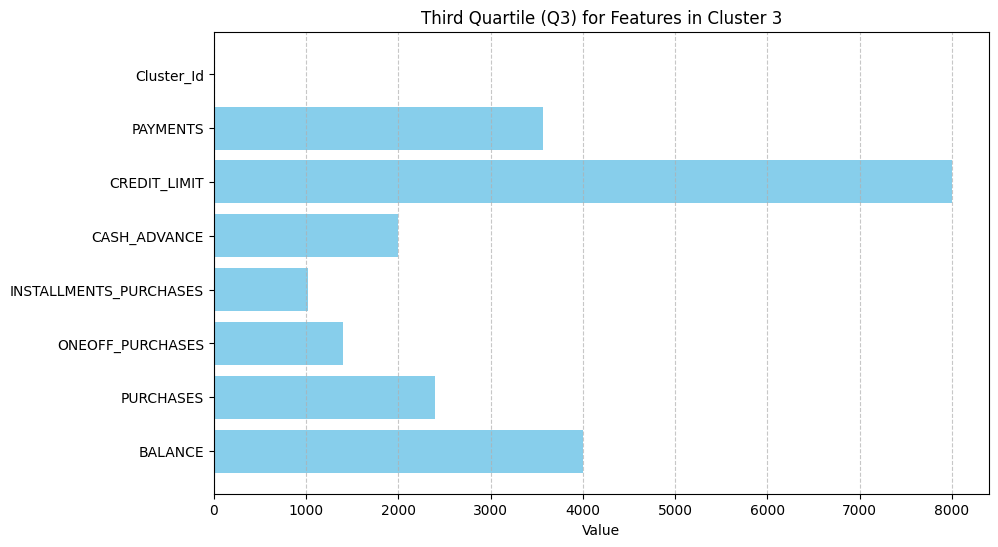

In [169]:
third_iqr = cl3_df.quantile(0.75)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(third_iqr.index, third_iqr.values, color='skyblue')
plt.xlabel('Value')
plt.title('Third Quartile (Q3) for Features in Cluster 3')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


# Cluster 4: "Smart Saver Solutions"
## - Targets customers who avoid certain types of purchases, offering innovative savings strategies and personalized recommendations.


In [170]:
clustersPersntage[4]

0.11655659830842313

In [171]:
cl4_df=df_final_2[df_final_2['Cluster_Id']==4]
cl4_df.describe()

BALANCE    PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
count  1006.000000  1006.000000       1006.000000             1006.000000   
mean    781.023518   837.431630        623.746640                0.001938   
std    1139.494838  1064.078773        519.051438                0.061480   
min       0.000000     0.010000          0.010000                0.000000   
25%      54.058562   159.077500        159.077500                0.000000   
50%     286.001978   457.585000        457.585000                0.000000   
75%    1114.426980  1028.877500       1028.877500                0.000000   
max    7000.000000  5000.000000       1500.000000                1.950000   

       CASH_ADVANCE  CREDIT_LIMIT     PAYMENTS  Cluster_Id  
count   1006.000000   1006.000000  1006.000000      1006.0  
mean       0.018171   4171.879330  1055.259782         4.0  
std        0.576339   2939.119825  1081.471007         0.0  
min        0.000000    150.000000     0.056466         4.0  
25%        0.000000   1600.000000   314.376576         4.0  
50%        0.000000   3000.000000   609.604224         4.0  
75%        0.000000   6500.000000  1383.174154         4.0  
max       18.280043  10000.000000  4000.000000         4.0

In [172]:
third_iqr = cl4_df.quantile(0.75)

# Print business insights for each feature
for feature, value in third_iqr.items():
    #print(f"Third Quartile (Q3) for {feature}: {value}")
    print(f"75% of customers in Cluster 0 hase {feature} less than or equal to {value} on average.")



75% of customers in Cluster 0 hase BALANCE less than or equal to 1114.4269795 on average.
75% of customers in Cluster 0 hase PURCHASES less than or equal to 1028.8775 on average.
75% of customers in Cluster 0 hase ONEOFF_PURCHASES less than or equal to 1028.8775 on average.
75% of customers in Cluster 0 hase INSTALLMENTS_PURCHASES less than or equal to 0.0 on average.
75% of customers in Cluster 0 hase CASH_ADVANCE less than or equal to 0.0 on average.
75% of customers in Cluster 0 hase CREDIT_LIMIT less than or equal to 6500.0 on average.
75% of customers in Cluster 0 hase PAYMENTS less than or equal to 1383.1741537500002 on average.
75% of customers in Cluster 0 hase Cluster_Id less than or equal to 4.0 on average.


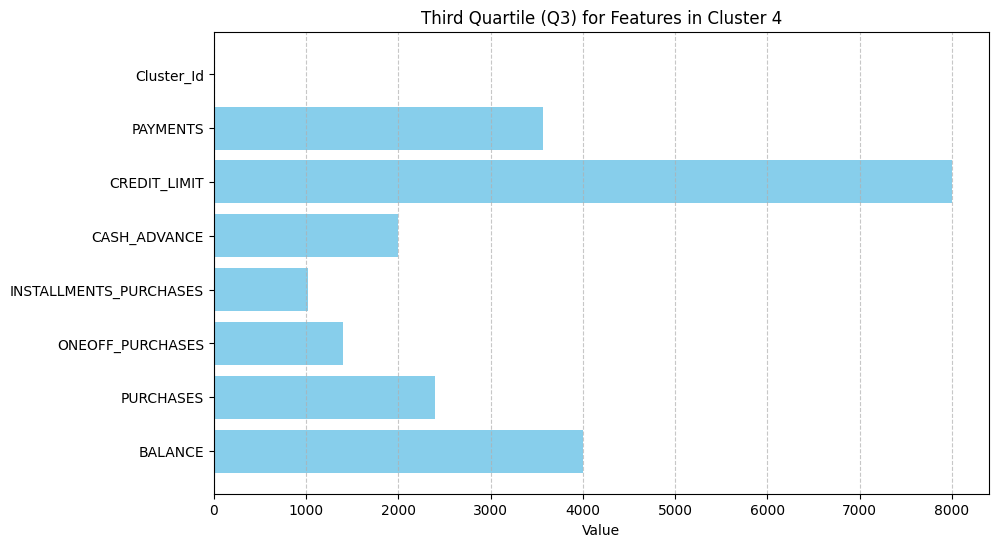

In [173]:
third_iqr = cl3_df.quantile(0.75)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(third_iqr.index, third_iqr.values, color='skyblue')
plt.xlabel('Value')
plt.title('Third Quartile (Q3) for Features in Cluster 4')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


# Cluster 5: "Convenience Connect"
## - Focuses on facilitating convenient purchases without the need for installment plans, providing streamlined payment options and quick transactions.


In [174]:
clustersPersntage[5]

0.08921330089213302

In [175]:
cl5_df=df_final_2[df_final_2['Cluster_Id']==5]
cl5_df.describe()

BALANCE    PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
count   770.000000   770.000000        770.000000                   770.0   
mean   2279.265054   594.284857        488.012325                     0.0   
std    1985.131302   809.141883        473.521526                     0.0   
min       1.599053     8.400000          8.400000                     0.0   
25%     859.057186   116.150000        116.150000                     0.0   
50%    1625.825247   294.130000        294.130000                     0.0   
75%    3154.941241   720.600000        720.600000                     0.0   
max    7000.000000  5000.000000       1500.000000                     0.0   

       CASH_ADVANCE  CREDIT_LIMIT     PAYMENTS  Cluster_Id  
count    770.000000    770.000000   770.000000       770.0  
mean    1162.727091   4441.590319  1540.849749         5.0  
std      770.276561   2996.365999  1270.080818         0.0  
min       18.427395    200.000000    28.654864         5.0  
25%      365.839187   2000.000000   515.663243         5.0  
50%     1160.371480   3500.000000  1146.380005         5.0  
75%     2000.000000   6500.000000  2258.622582         5.0  
max     2000.000000  10000.000000  4000.000000         5.0

In [176]:
third_iqr = cl5_df.quantile(0.75)

# Print business insights for each feature
for feature, value in third_iqr.items():
    #print(f"Third Quartile (Q3) for {feature}: {value}")
    print(f"75% of customers in Cluster 0 hase {feature} less than or equal to {value} on average.")



75% of customers in Cluster 0 hase BALANCE less than or equal to 3154.941241 on average.
75% of customers in Cluster 0 hase PURCHASES less than or equal to 720.6 on average.
75% of customers in Cluster 0 hase ONEOFF_PURCHASES less than or equal to 720.6 on average.
75% of customers in Cluster 0 hase INSTALLMENTS_PURCHASES less than or equal to 0.0 on average.
75% of customers in Cluster 0 hase CASH_ADVANCE less than or equal to 2000.0 on average.
75% of customers in Cluster 0 hase CREDIT_LIMIT less than or equal to 6500.0 on average.
75% of customers in Cluster 0 hase PAYMENTS less than or equal to 2258.62258175 on average.
75% of customers in Cluster 0 hase Cluster_Id less than or equal to 5.0 on average.


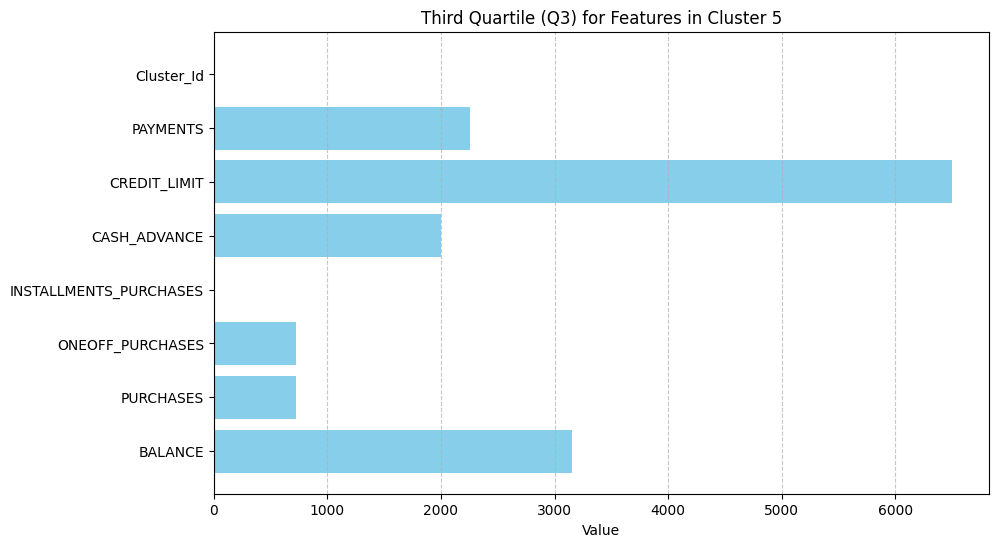

In [177]:
third_iqr = cl5_df.quantile(0.75)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(third_iqr.index, third_iqr.values, color='skyblue')
plt.xlabel('Value')
plt.title('Third Quartile (Q3) for Features in Cluster 5')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


# Cluster 6: "Opportunistic Ventures"
## - Targets customers who prefer cash transactions over advance payments, offering flexible payment solutions and financial flexibility.

In [178]:
clustersPersntage[6]

0.05329625767581972

In [179]:
cl6_df=df_final[df_final['Cluster_Id']==6]
cl6_df.describe()

BALANCE    PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
count  1757.000000  1757.000000       1757.000000             1757.000000   
mean    403.037231   524.798162          1.228862              489.608998   
std     847.139013   632.460264          7.823221              479.157473   
min       0.000000     0.010000          0.000000                0.000000   
25%      21.441736   164.680000          0.000000              160.000000   
50%      61.080098   327.940000          0.000000              327.800000   
75%     318.034340   609.010000          0.000000              611.310000   
max    7000.000000  5000.000000         90.000000             2000.000000   

       CASH_ADVANCE  CREDIT_LIMIT     PAYMENTS  Cluster_Id  Cluster_Id_AGG  
count   1757.000000   1757.000000  1757.000000      1757.0     1757.000000  
mean       0.283979   3020.593844   708.080730         6.0        0.086511  
std        5.354693   2329.489625   769.303308         0.0        0.516719  
min        0.000000    300.000000     0.056466         6.0        0.000000  
25%        0.000000   1200.000000   225.796349         6.0        0.000000  
50%        0.000000   2500.000000   430.487291         6.0        0.000000  
75%        0.000000   4000.000000   864.625632         6.0        0.000000  
max      169.355104  10000.000000  4000.000000         6.0        6.000000

In [180]:
third_iqr = cl6_df.quantile(0.75)

# Print business insights for each feature
for feature, value in third_iqr.items():
    #print(f"Third Quartile (Q3) for {feature}: {value}")
    print(f"75% of customers in Cluster 0 hase {feature} less than or equal to {value} on average.")



75% of customers in Cluster 0 hase BALANCE less than or equal to 318.03434 on average.
75% of customers in Cluster 0 hase PURCHASES less than or equal to 609.01 on average.
75% of customers in Cluster 0 hase ONEOFF_PURCHASES less than or equal to 0.0 on average.
75% of customers in Cluster 0 hase INSTALLMENTS_PURCHASES less than or equal to 611.31 on average.
75% of customers in Cluster 0 hase CASH_ADVANCE less than or equal to 0.0 on average.
75% of customers in Cluster 0 hase CREDIT_LIMIT less than or equal to 4000.0 on average.
75% of customers in Cluster 0 hase PAYMENTS less than or equal to 864.625632 on average.
75% of customers in Cluster 0 hase Cluster_Id less than or equal to 6.0 on average.
75% of customers in Cluster 0 hase Cluster_Id_AGG less than or equal to 0.0 on average.


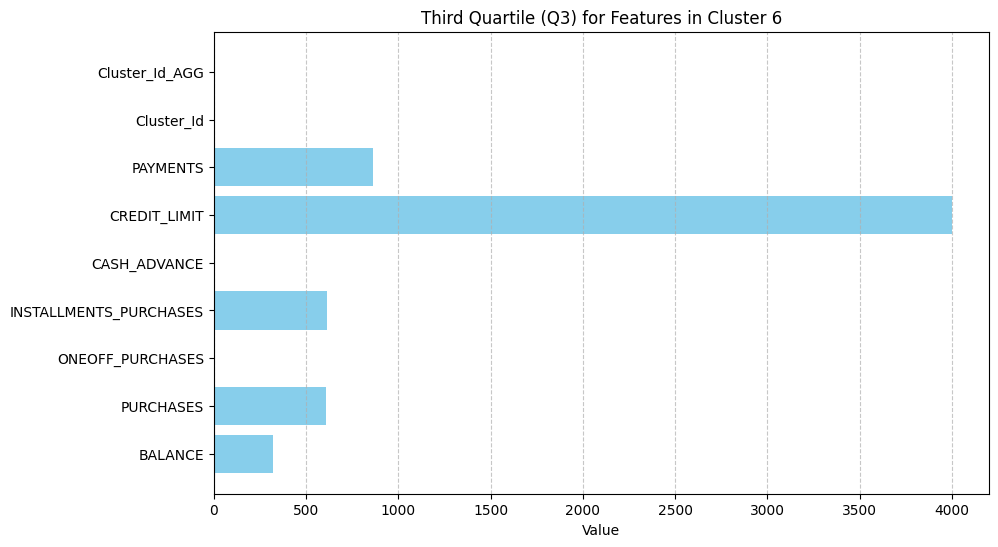

In [181]:
third_iqr = cl6_df.quantile(0.75)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(third_iqr.index, third_iqr.values, color='skyblue')
plt.xlabel('Value')
plt.title('Third Quartile (Q3) for Features in Cluster 6')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


# FINAL Concloution


### Cluster 0: "Frugal Essentials" - Targets customers with low balances and minimal spending habits, focusing on essential purchases only.
### Cluster 1: "Budget Savvy" - Caters to customers who prefer strict budgeting, offering financial management tools and advice.
### Cluster 2: "Premium Powerhouse" - Appeals to high-spending customers with excellent credit and frequent purchases, providing exclusive offers and rewards.
### Cluster 3: "Elite Spenders Club" - Exclusively for top-tier customers with the highest balances, offering luxury services and tailored experiences.
### Cluster 4: "Smart Saver Solutions" - Targets customers who avoid certain types of purchases, offering innovative savings strategies and personalized recommendations.
### Cluster 5: "Convenience Connect" - Focuses on facilitating convenient purchases without the need for installment plans, providing streamlined payment options and quick transactions.
### Cluster 6: "Opportunistic Ventures" - Targets customers who prefer cash transactions over advance payments, offering flexible payment solutions and financial flexibility.